<a href="https://colab.research.google.com/github/BharatSingla12/Car-Price-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Project Title : Car Price Prediction </u></b>

## Tasks
1. Perform data cleaning and pre-processing.
    - What steps did you use in this process and how did you clean your data?
2. Perform exploratory data analysis on the given dataset.
    - Explain each and every graph that you make.
3. Train a ml-model and evaluate it using different metrics.
    - Why did you choose that particular model? What was the accuracy?
4. Hyperparameter optimization and feature selection is a plus.
5. Model deployment and use of ml-flow is a plus. (optional)
6. Perform model interpretation and show feature importance for your model.
    - Provide some explanation for the above point.
7. Future steps
Note: try to have your notebooks as presentable as possible.

## <b>About the data: </b>
With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available. To solve the price problem we have created a dataset of 19237 for the training dataset and 8245 for the test dataset.

## <b>Attribute Information: </b>


- ID
- Price: price of the care(Target Column)
- Levy
- Manufacturer
- Model
- Prod. year
- Category
- Leather interior
- Fuel type
- Engine volume
- Mileage
- Cylinders
- Gear box type
- Drive wheels
- Doors
- Wheel
- Color
- Airbags

# <b><u>Data Cleaning and Pre-processing</u></b>

## Importing the all the libraies and loading the dataset

In [ ]:
# Importing the libraries
import numpy as np               # linear algebra
import pandas as pd              # data processing
import seaborn as sns            # Graph ploting 
import matplotlib.pyplot as plt  # Graph ploting 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
# # This is formatted as code
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Importing the dataset
# df = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data sets/car_price_prediction.csv')
df = pd.read_csv('car_price_prediction.csv')

In [ ]:
# Seaborn setting 
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
# To ignore irrelevent warnigns 
import warnings
warnings.filterwarnings('ignore')

## **Lets take a glimpse of the overall data and clean the data**

In [ ]:
# Lets preview the data 
df.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [ ]:
# Get the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
print(f'The shape of the data set is {df.shape}.')

The shape of the data set is (19237, 18).


In [ ]:
# Lets check for the number of unique value in each column
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

**Point:** The number of rows in dataset are 19237 but number of unique IDs are less 18924 therefore it shows that there might be duplicate rows.

In [ ]:
# Check for the duplicate rows
print(f"The total duplicate rows are {df.duplicated().sum()}.")

# Drop all duplicates in the DataFrame
df = df.drop_duplicates()
      
# Check for the duplicate rows
print(f"The total duplicate rows after deleting duplicates are {df.duplicated().sum()}.")

The total duplicate rows are 313.
The total duplicate rows after deleting duplicates are 0.


In [ ]:
# Lets find the number of NaN values in each column
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
# Lets see the unique values and frequency of Levy feature
df['Levy'].value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [ ]:
# Remove the dash with 0 in Levy and change datatype to integer
df.loc[df['Levy'] == '-', 'Levy'] = 0      # Replace - with 0 
df['Levy'] = df['Levy'].astype(int)        # Change datatype from string to intger
df.info()                                  # Lets check the info again 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int32  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [ ]:
# Lets see the unique values and frequency of Mileage feature
df['Mileage'].value_counts()

0 km         714
200000 km    181
150000 km    159
160000 km    120
180000 km    117
            ... 
100563 km      1
354300 km      1
21178 km       1
110539 km      1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

In [ ]:
# Remove km from  Mileage columne and convert the data in integer
df['Mileage'] = df['Mileage'].apply(lambda x : int(x.split()[0]))

In [ ]:
# Lets see the unique values and frequency of Mileage feature
df['Engine volume'].value_counts()

2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [ ]:
turbo_eng = df[df['Engine volume'].str.contains('Turbo')]['Engine volume'].value_counts().sum()
print(f"Out of {df.shape[0]} cars {turbo_eng} - {round((100*turbo_eng)/df.shape[0])}% have turbo engine.")

Out of 18924 cars 1892 - 10% have turbo engine.


Since 10% contains turbo engines ignore it for now is not good idea, lets create a new feature that tells whether the car has turbo engine or not.

In [ ]:
# Let create a new feature to show whether the engine is turbo or not
df['engine_turbo'] = np.where(df['Engine volume'].str.contains('Turbo'), 1, 0)

In [ ]:
# Remove Turbo from  Engine volume columne and convert the data in float
df['Engine volume'] = df['Engine volume'].apply(lambda x : float(x.split()[0]))
# Lets check the info again 
df.info()                                  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int32  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [ ]:
# Lets see the unique values and frequency of Doors feature
df['Doors'].value_counts()

04-May    18032
02-Mar      768
>5          124
Name: Doors, dtype: int64

In [ ]:
# The values in door columns converted in datetime format, lets convert it back to proper format
def door(value):
    if value == '04-May':
        return "4-5"
    elif value == '02-Mar':
        return "2-3"
    elif value == '>5':
        return "5+"

df['Doors'] = df['Doors'].apply(lambda x : door(x))
# Lets view the door columns again
df['Doors'].value_counts()

4-5    18032
2-3      768
5+       124
Name: Doors, dtype: int64

In [ ]:
# Change the name of columns in short names
df = df.rename(columns={'Price': 'price', 'Levy': 'levy', 'Manufacturer': 'manufacturer', 
                        'Model': 'model', 'Prod. year': 'prd_yr', 'Category': 'category', 
                        'Leather interior': 'leather_intr', 'Fuel type': 'fuel_typ', 
                        'Engine volume': 'engine_vol', 'Mileage': 'mileage(km)' , 'Cylinders': 'cylinders',
                        'Gear box type': 'gear_box', 'Drive wheels': 'drive_wheels', 'Doors': 'doors',
                        'Wheel': 'wheel', 'Color' : 'color', 'Airbags' : 'airbags'
                       })

In [ ]:
# Drop the reduntant column ID
df = df.drop(['ID'], axis = 1) 
# lets preview the data
df.head()

price  levy manufacturer    model  prd_yr   category leather_intr fuel_typ  \
0  13328  1399        LEXUS   RX 450    2010       Jeep          Yes   Hybrid   
1  16621  1018    CHEVROLET  Equinox    2011       Jeep           No   Petrol   
2   8467     0        HONDA      FIT    2006  Hatchback           No   Petrol   
3   3607   862         FORD   Escape    2011       Jeep          Yes   Hybrid   
4  11726   446        HONDA      FIT    2014  Hatchback          Yes   Petrol   

   engine_vol  mileage(km)  cylinders   gear_box drive_wheels doors  \
0         3.5       186005        6.0  Automatic          4x4   4-5   
1         3.0       192000        6.0  Tiptronic          4x4   4-5   
2         1.3       200000        4.0   Variator        Front   4-5   
3         2.5       168966        4.0  Automatic          4x4   4-5   
4         1.3        91901        4.0  Automatic        Front   4-5   

              wheel   color  airbags  engine_turbo  
0        Left wheel  Silver       12             0  
1        Left wheel   Black        8             0  
2  Right-hand drive   Black        2             0  
3        Left wheel   White        0             0  
4        Left wheel  Silver        4             0

In [ ]:
# Lets define the continous and categorical columns
cont_col = ['levy', 'prd_yr', 'engine_vol', 'mileage(km)', 'airbags']
cat_col  = ['manufacturer', 'model', 'category', 'leather_intr', 'fuel_typ', 'gear_box', 'drive_wheels', 'doors', 'color', 'engine_turbo']

In [ ]:
# Lets see the unique values and the frequency of values in each categorical columns
for col in cat_col:
    print(f'\033[1mFrequency for the column: {col}  \033[0m')
    print(df[col].value_counts())
    print('='*50+"||")

Frequency for the column: manufacturer  
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: manufacturer, Length: 65, dtype: int64
==================================================||
Frequency for the column: model  
Prius                     1069
Sonata                    1067
Camry                      929
Elantra                    910
E 350                      534
                          ... 
1500,1600 Schtufenheck       1
E 420                        1
C 250 luxury                 1
Passat sport                 1
Prius C aqua                 1
Name: model, Length: 1590, dtype: int64
==================================================||
Frequency for the column: category  
Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal     

**Note:** The column **manufacturer** and **model** both are categorical columns but they contains too many categories. For a ML algoritham that much categories will not give good result. So, either we have to drop them or have to transform it into more simpler new features.

# <u>**Exploratory data analysis** </u>

In [ ]:
df.head()

price  levy manufacturer    model  prd_yr   category leather_intr fuel_typ  \
0  13328  1399        LEXUS   RX 450    2010       Jeep          Yes   Hybrid   
1  16621  1018    CHEVROLET  Equinox    2011       Jeep           No   Petrol   
2   8467     0        HONDA      FIT    2006  Hatchback           No   Petrol   
3   3607   862         FORD   Escape    2011       Jeep          Yes   Hybrid   
4  11726   446        HONDA      FIT    2014  Hatchback          Yes   Petrol   

   engine_vol  mileage(km)  cylinders   gear_box drive_wheels doors  \
0         3.5       186005        6.0  Automatic          4x4   4-5   
1         3.0       192000        6.0  Tiptronic          4x4   4-5   
2         1.3       200000        4.0   Variator        Front   4-5   
3         2.5       168966        4.0  Automatic          4x4   4-5   
4         1.3        91901        4.0  Automatic        Front   4-5   

              wheel   color  airbags  engine_turbo  
0        Left wheel  Silver       12             0  
1        Left wheel   Black        8             0  
2  Right-hand drive   Black        2             0  
3        Left wheel   White        0             0  
4        Left wheel  Silver        4             0

## Univariate Variable Analysis

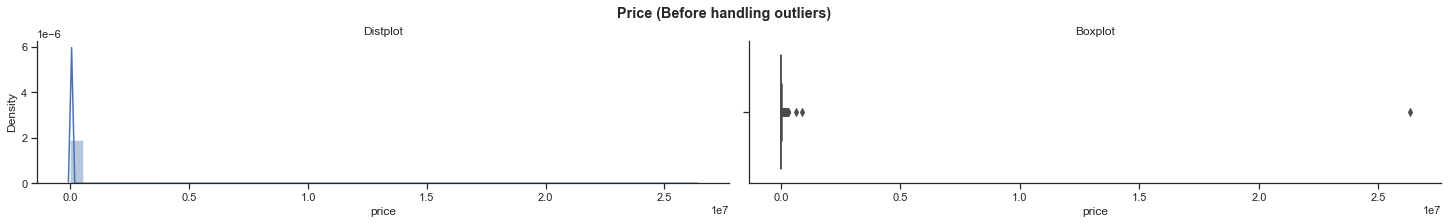

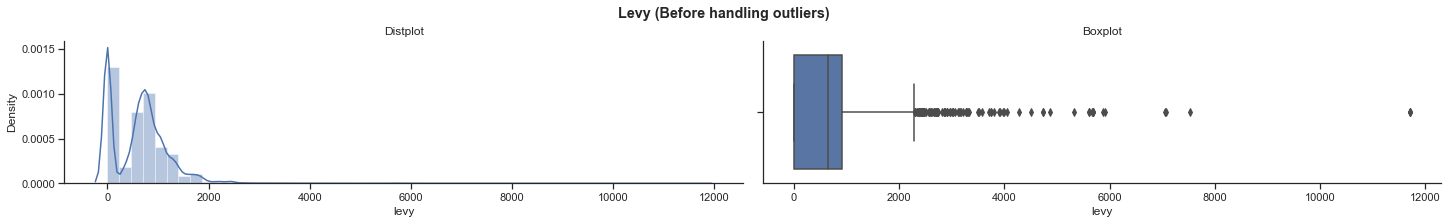

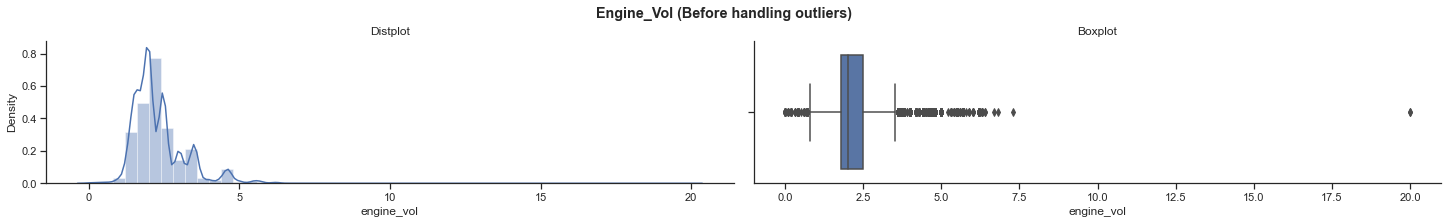

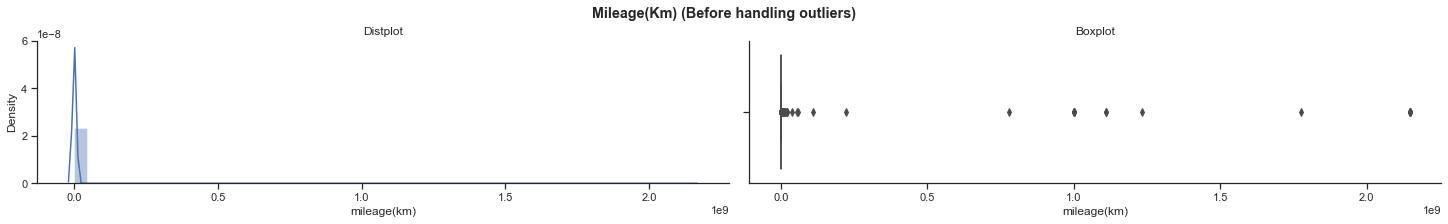

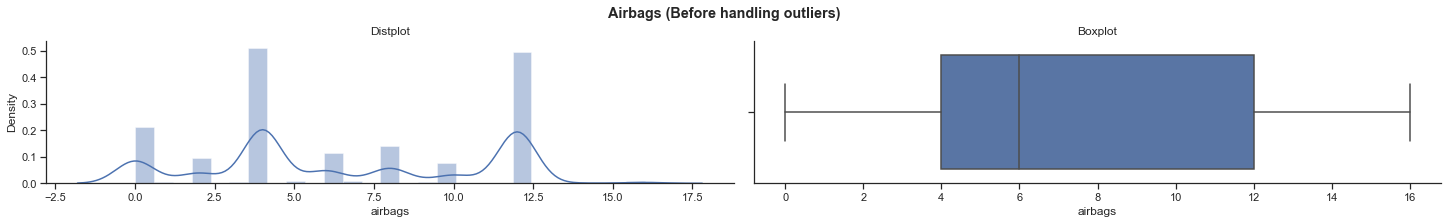

In [ ]:
# Lets define the continous columns
cont_col = ['price', 'levy',  'engine_vol', 'mileage(km)', 'airbags']

#Plotting Graphs Before treating outliers of continous features
for col in cont_col:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(df[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(df[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

In [ ]:
# Function to get amount of outliers in numerical columns
def outlier_prcnt(df, col_list):
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        # Print total outlers and percentage using IQR method
        outliers = ((df[col_name] > fence_high) | (df[col_name] < fence_low)).sum()
        total = df[col_name].shape[0]
        print(f"Total outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")

# Lets get the amount of outliers in each numerical columns
outlier_prcnt(df, cont_col)

Total outliers in price are: 1055 - 5.57%.
Total outliers in levy are: 160 - 0.85%.
Total outliers in engine_vol are: 1358 - 7.18%.
Total outliers in mileage(km) are: 635 - 3.36%.
Total outliers in airbags are: 0 - 0.0%.


In [ ]:
# # Removing outliers for price column
# q1 = df['price'].quantile(0.25)
# q3 = df['price'].quantile(0.75)
# IQR = q3 - q1
# df = df[~((df['price'] < (q1 - 1.5 * IQR)) |(df['price'] > (q3 + 1.5 * IQR)))]

In [ ]:
# Function to capping the outliers in numerical columns using IQR method
def outlier_handle(df, col_list):
    df_new = df.copy()
    for col_name in col_list:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3-q1  #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        # Capping Outliers using IQR method
        df_new.loc[:,  col_name] = np.where(df[col_name]> fence_high, fence_high,
                                         np.where(df[col_name]< fence_low, fence_low,
                                                  df[col_name]))
    return df_new
# Lets get the amount of outliers in each numerical columns
df = outlier_handle(df, cont_col)

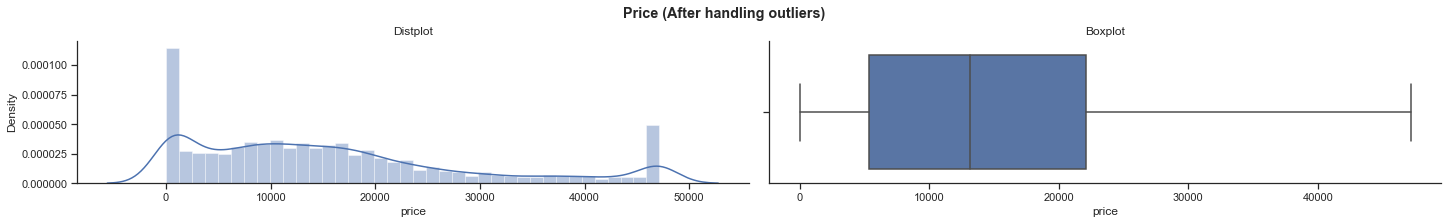

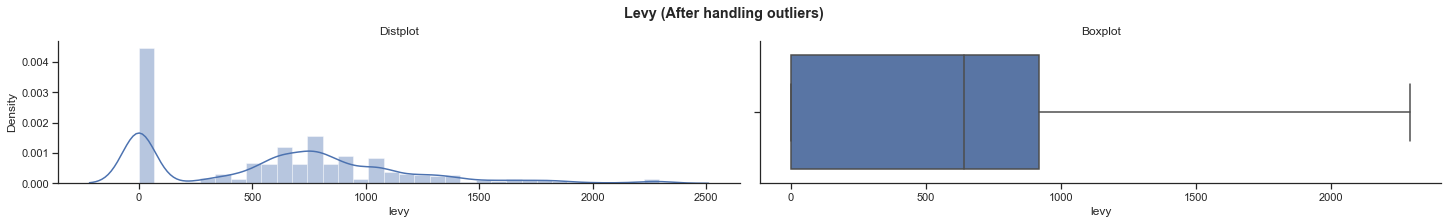

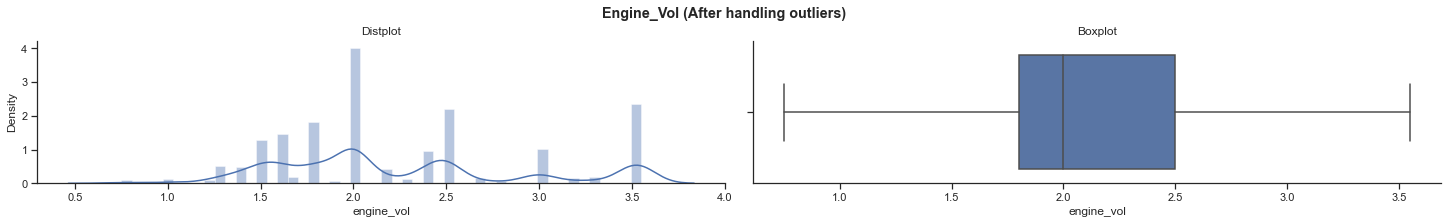

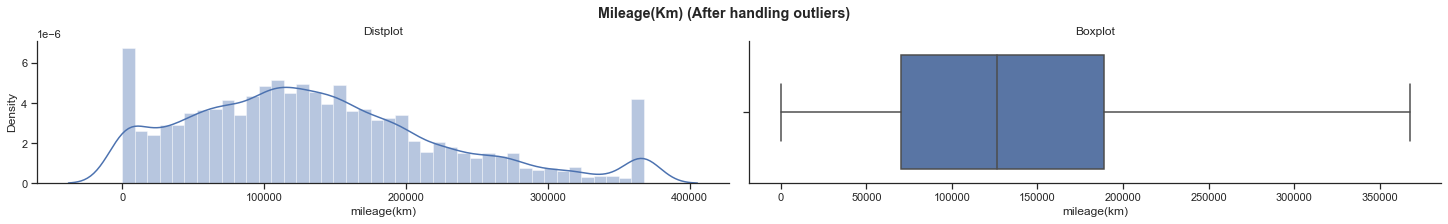

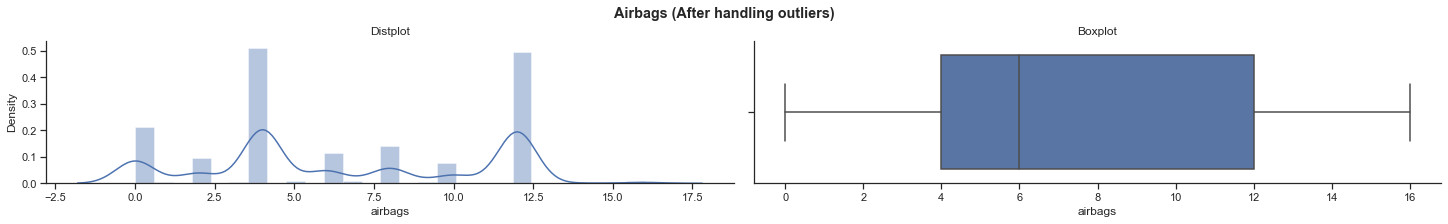

In [ ]:
#Plotting Graphs After treating outliers of continous features
for col in cont_col:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.distplot(df[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(df[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (After handling outliers)',weight='bold')
    fig.show()

**Conclusions:** Note: From the above density plot of varierty of cars we make the following conclusions.
1. Mileage, levy, and the price are right skewed
2. The varierty of car for particular values of airbags are very high.
3. The varierty of car for particular values of engine volume are very high.

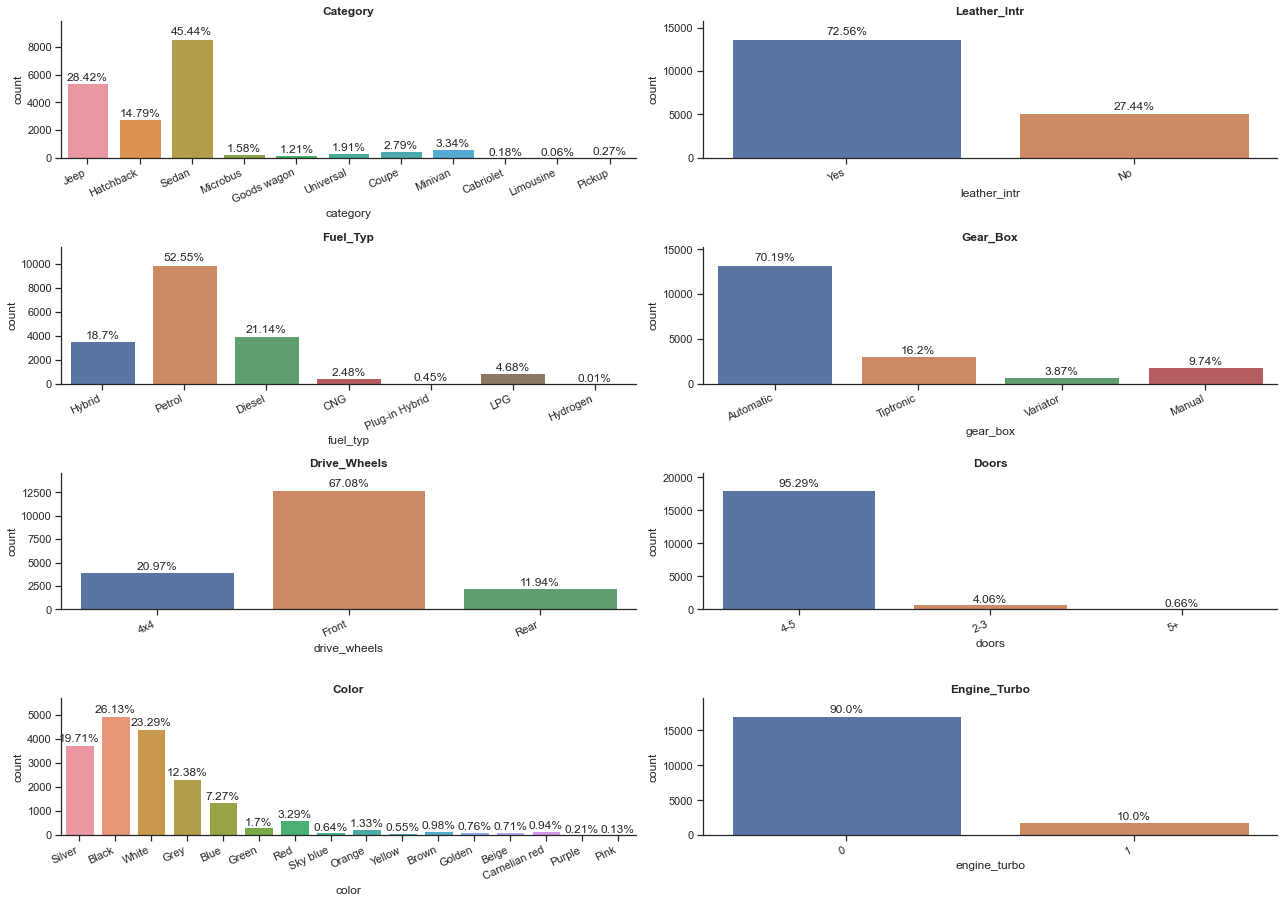

In [ ]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()*1.015
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')


# Lets define the continous and categorical columns
cat_col  = ['category', 'leather_intr', 'fuel_typ', 'gear_box', 'drive_wheels', 'doors', 'color', 'engine_turbo']

# Plot the bar plot 
r = int(len(cat_col)/2 +1)    # Defining r to autofit the number and size of plots

# Plotting the countplots for each target variable
plt.figure(figsize=(18,r*3))
for n,column in enumerate(cat_col):
    plot = plt.subplot(r,2,n+1)
    sns.countplot(df[column]).margins(y=0.15)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=25, horizontalalignment='right')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

**Conclusions:** From the above bar plot of varierty of cars we make the following conclusions.
1. About 45.44% cars are Sedan, 28.42% are Jeep, 14.79% are Hatchback, and the rest of the categoris has market share of less than 5%.
2. In 52.55% car varients, the fuel type is petrol, and 21.14% is Diesel and 18.7% is Hybrid, and other fuel type like CNG, LPG, and Hydrogen, and plug-in hybrid are very low.
3. About 67% of car varients have front drive wheel.
4. About 72.6% of car varients have leather interior.
5. About 70% of car varients have automatic gear box.
6. About 95% of car varients have 4-5 doors.
7. About 90% of car varients have turbo engine.
8. Mostly car varients are black (26.13%), white(23.29%) and (19.71%).

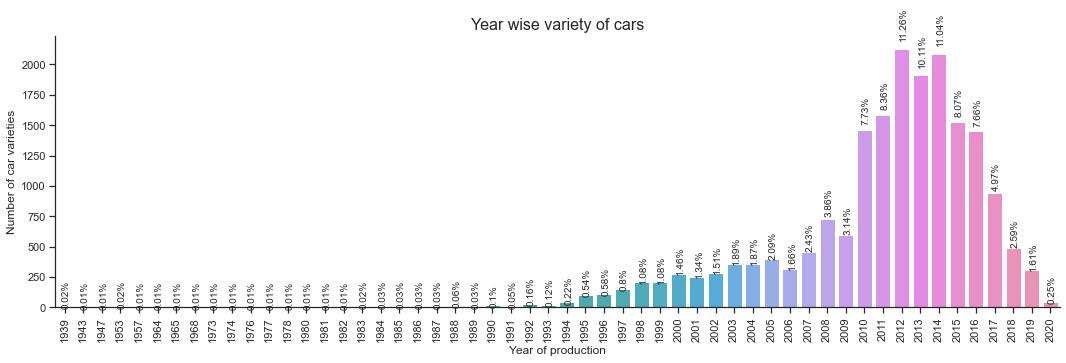

In [ ]:
# Create dataframe for model count and percentage
df1 = df.copy()  # Select the columns
df2 = df1.groupby(by= ['prd_yr'], as_index=False).count().sort_values(by='prd_yr', ascending=True)[['prd_yr','price']]
df2 = df2.rename(columns={'price': 'count'})
df2['prd_yr_per'] = round(df2['count']/sum(df2['count'])*100,2)

# Plot the bar chart 
plt.figure(figsize=(18,5))
plot = sns.barplot(x = 'prd_yr', y = 'count',  data = df2)
plt.title('Year wise variety of cars', fontsize=16)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel('Year of production', fontsize=12)
plt.ylabel('Number of car varieties', fontsize=12)

# Annonate the bar plot
for i,p in enumerate(plot.patches):
        percentage = df2['prd_yr_per'][i]
        x = p.get_x() + p.get_width() / 3
        y = p.get_height()*1.04
        plot.annotate(f'{percentage}%', (x, y), size = 10, rotation=90)
plt.show()

**Conclusions:** From the above bar plot of varierty of cars we make the following conclusions.
1. The quantity of car varients are gradualy increases year by year and then sharpely decreases after 2014.
2. The quantity of car varients are maximum from 2012 to 2014 and then it started falling down.

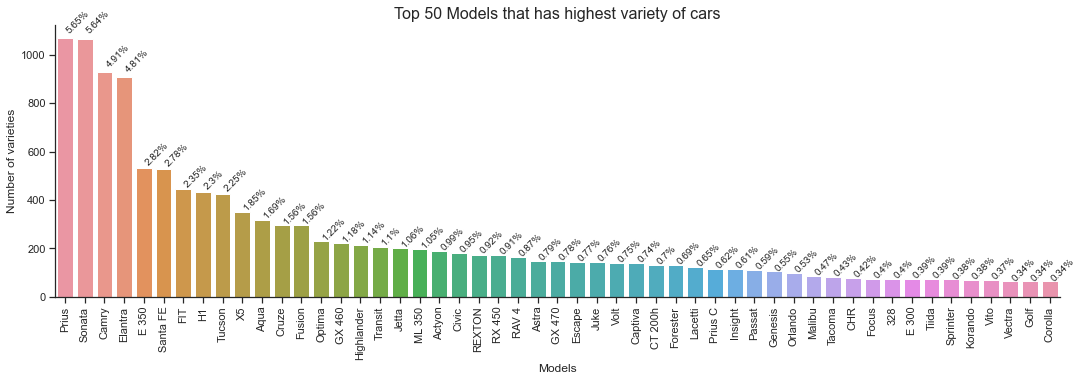

In [ ]:
# Create dataframe for model count and percentage
model_count_df = df['model'].value_counts().to_frame().reset_index()
model_count_df['model_per'] = round(model_count_df['model']/sum(model_count_df['model'])*100,2)

# Plot the bar chart 
plt.figure(figsize=(18,5))
plot = sns.barplot(x = 'index', y = 'model',  data = model_count_df.loc[:50,:])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('Top 50 Models that has highest variety of cars', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Number of varieties', fontsize=12)

# Annonate the bar plot
for i,p in enumerate(plot.patches):
        percentage = model_count_df['model_per'][i]
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()*1.02
        plot.annotate(f'{percentage}%', (x, y), size = 10, rotation=45)
plt.show()

**Conclusions:** From the above bar plot of varierty of cars we make the following conclusions.
1. The models Prius, Sonata, Camry, Elantra has highest varients of cars.
2. Out of 1590 modles, only these four contributes 21% of car variants.

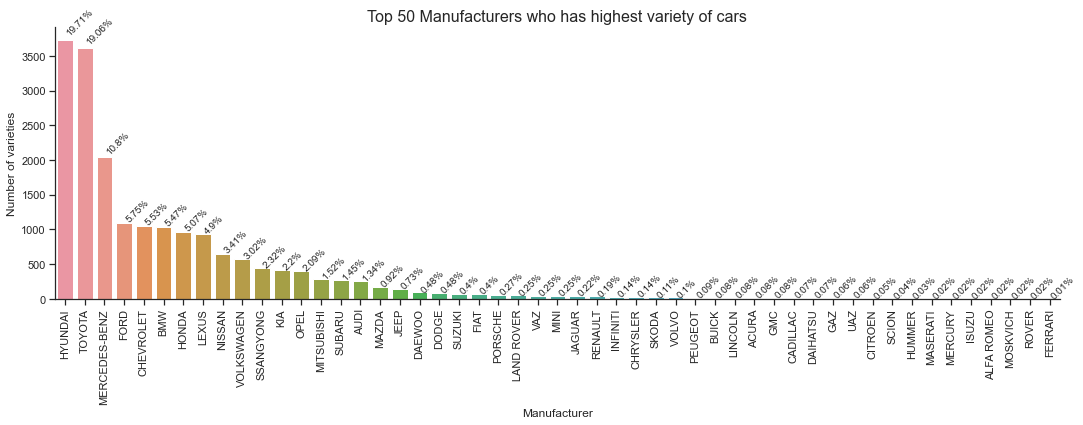

In [ ]:
# Create dataframe for model count and percentage
manufacturer_count_df = df['manufacturer'].value_counts().to_frame().reset_index()
manufacturer_count_df['manufacturer_per'] = round(manufacturer_count_df['manufacturer']/sum(manufacturer_count_df['manufacturer'])*100,2)

# Plot the bar chart 
plt.figure(figsize=(18,5))
plot = sns.barplot(x = 'index', y = 'manufacturer',  data = manufacturer_count_df.loc[:50,:])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('Top 50 Manufacturers who has highest variety of cars', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Number of varieties', fontsize=12)

# Annonate the bar plot
for i,p in enumerate(plot.patches):
        percentage = manufacturer_count_df['manufacturer_per'][i]
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()*1.02
        plot.annotate(f'{percentage}%', (x, y), size = 10, rotation=45)
plt.show()

**Conclusions:** From the above bar plot of varierty of cars we make the following conclusions.
1. The manufacturer Hyndai, Toyota, Mercedes-Benz has highest varients of cars.
2. Out of 65 manufacturer, only these 3 produces 48.8% of car variants.

## Bivariate Variable Analysis

### Production year wise analysis of each feature

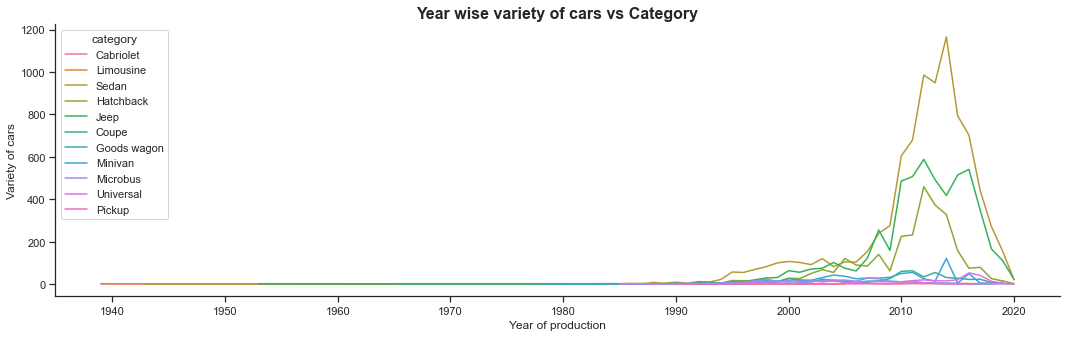

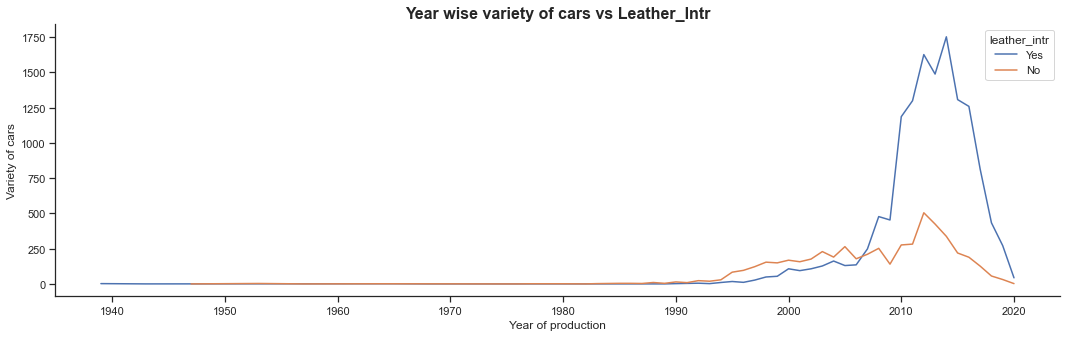

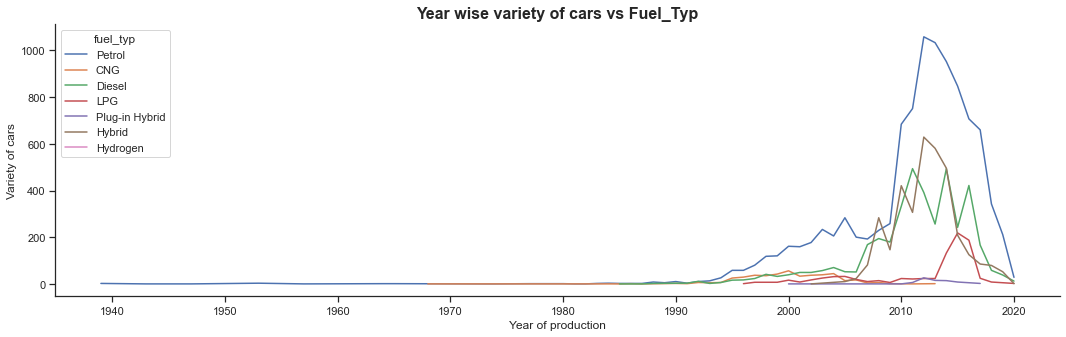

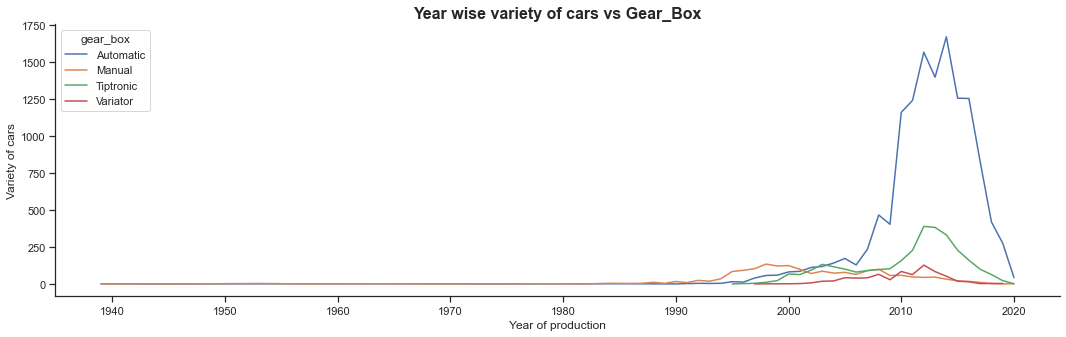

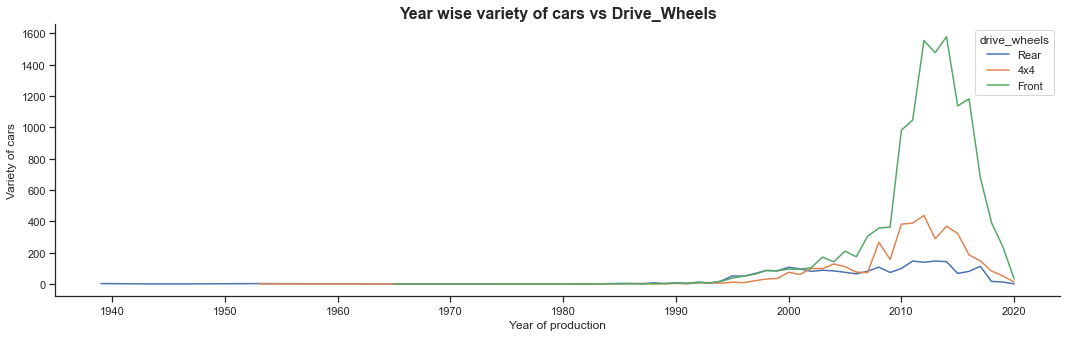

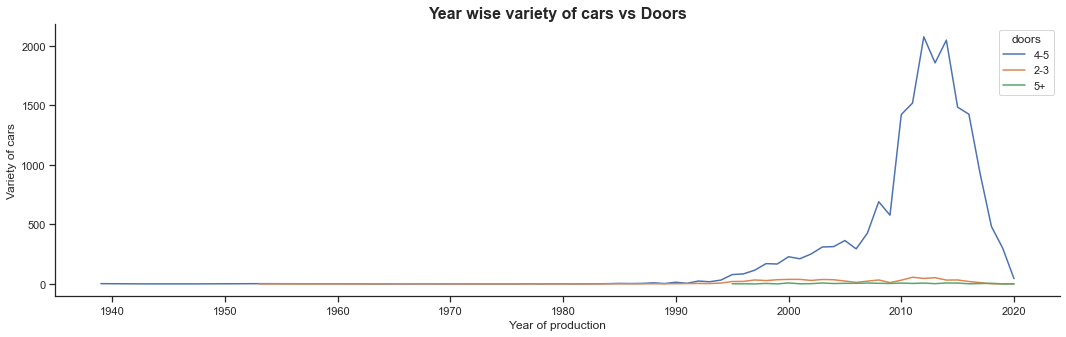

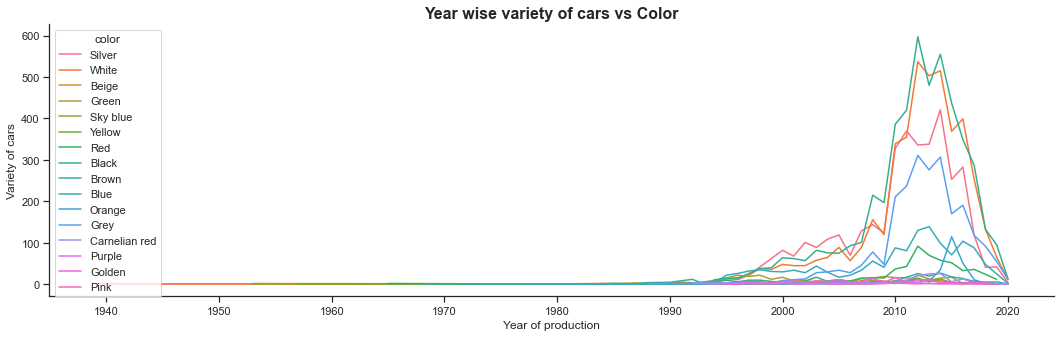

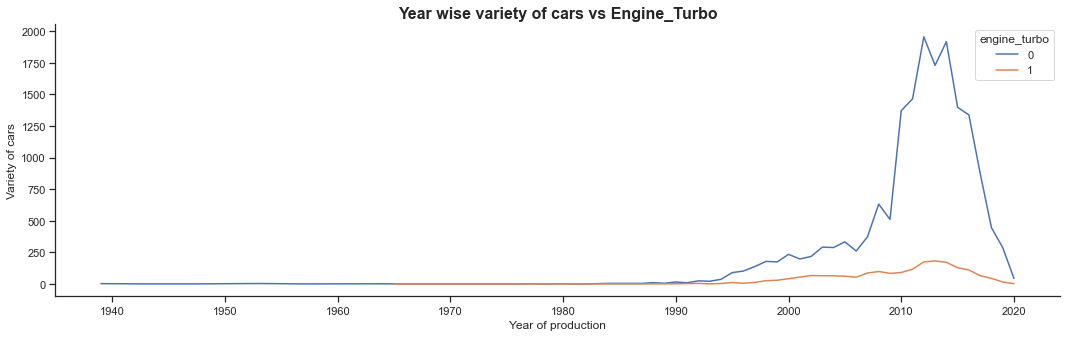

In [ ]:
for hue in cat_col:
    plt.figure(figsize=(18,5))
    df1 = df[['prd_yr',hue, 'price']].groupby(by= ['prd_yr',hue], as_index=True).count().reset_index()
    plot = sns.lineplot(x = 'prd_yr', y = 'price',  data = df1, hue = hue)
    plt.title(f'Year wise variety of cars vs {hue.title()}', fontsize=16,weight='bold')
    plt.xlabel('Year of production', fontsize=12)
    plt.ylabel('Variety of cars', fontsize=12)
    plt.show()

**Conclusions:** From the above line chart we make the following conclusions.
1. The color and category choices for car varients do not changes from start to end.
2. Mostly car varients has the leather interior but the trend changes from 1990 to 2008.
3. The choice of petrol fuel type was always the choice.
4. The automatic gear box started dominating the market after the start of year 2000.
5. The front drive whell started dominating the market after the start of the year 2000.
6. The 4-5 doors was always the choice.
7. Car with no turbo engine always the market dopminator.

In [ ]:
cat_col

['category',
 'leather_intr',
 'fuel_typ',
 'gear_box',
 'drive_wheels',
 'doors',
 'color',
 'engine_turbo']

### Mean price wise analysis of each feature

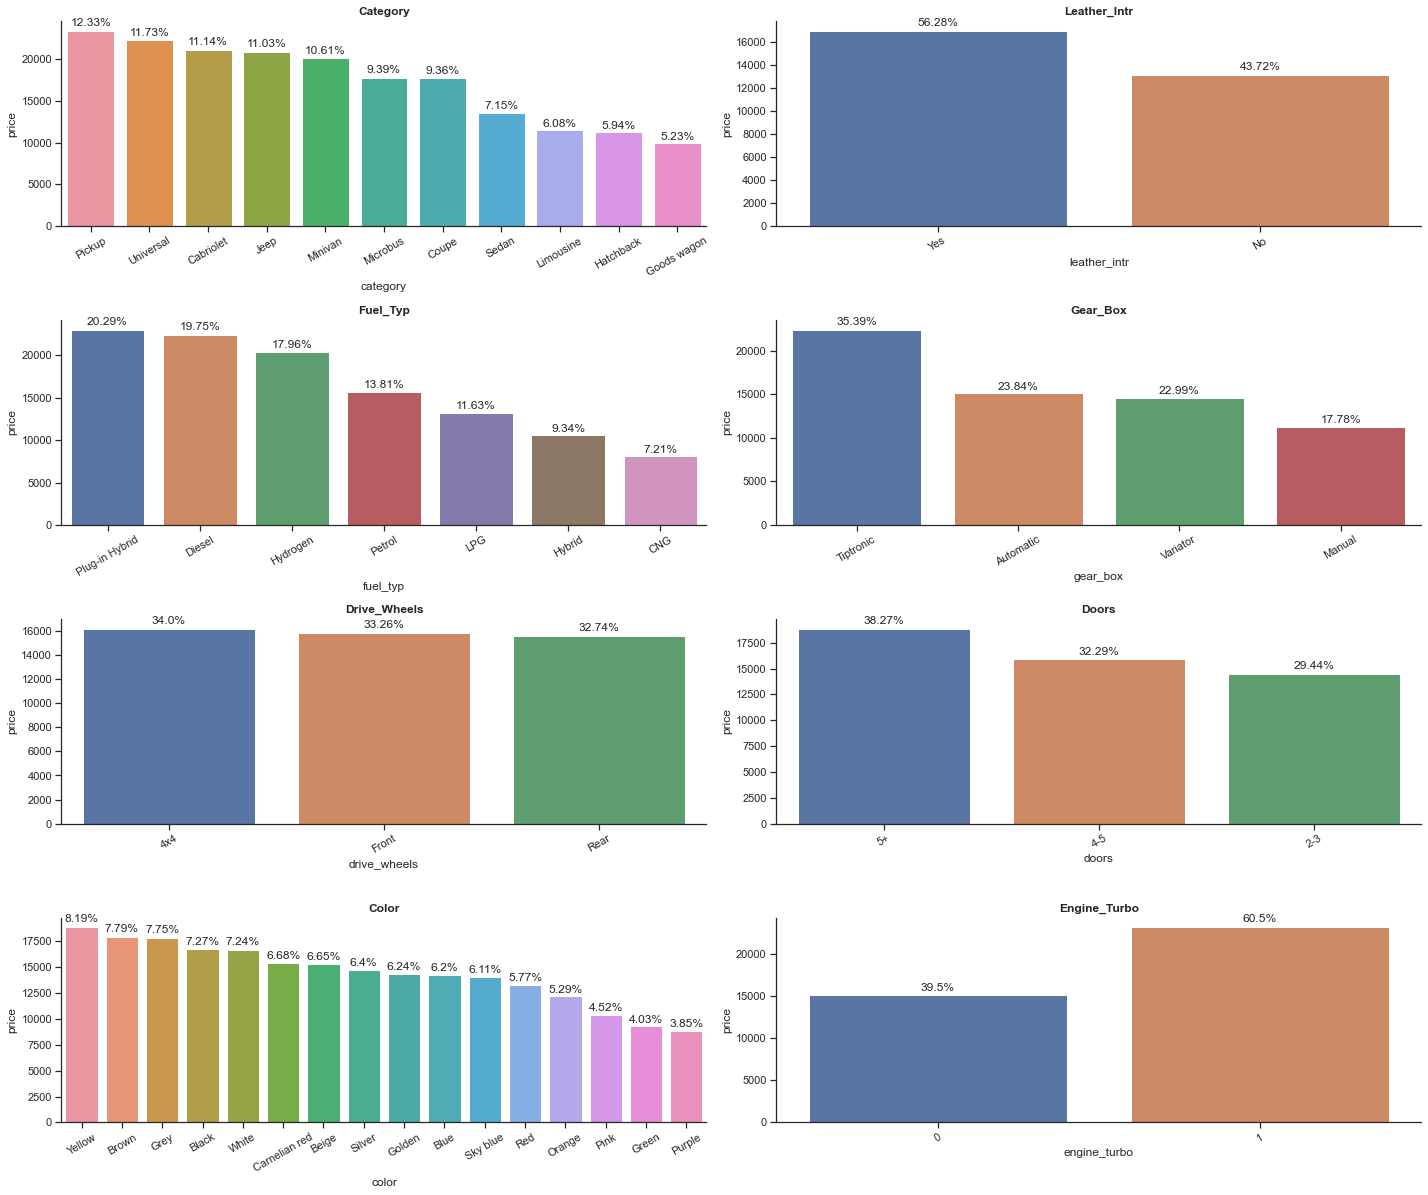

In [ ]:
# Plot the bar plot 
r = int(len(cat_col)/2 +1)    # Defining r to autofit the number and size of plots

# Plotting the countplots for each target variable
plt.figure(figsize=(20,r*4))
for n,column in enumerate(cat_col[:]):
    df1 = df[['price', column]].groupby(by= [column], as_index=False).agg('mean').sort_values(by='price', ascending=False)
    plot = plt.subplot(r,2,n+1)
    sns.barplot(x =df1[column], y= df1['price'])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

**Conclusions:** From the above bar plots of mean price of cars we make the following conclusions.
1. The average price of plug-in Hybrid is maximum and for the CNG is the lowest. The price follow the trend: 
plug-in Hybrid > Diesel > Hydrogen > Petrol > LPG > Hybrid > CNG
2. The average price of tiptronic gear box is maximum and for the manual the average price is the lowest.
3. The average price for 4x4, front, and rear drive wheels are the almost same.
4. The average price of 5+ doors  is maximum and for the 2-3 doors the average price is the lowest.
5. The average price of yellow color is maximum and for the purple color the average price is the lowest.
6. The average price of cars with turbo engine is higher.

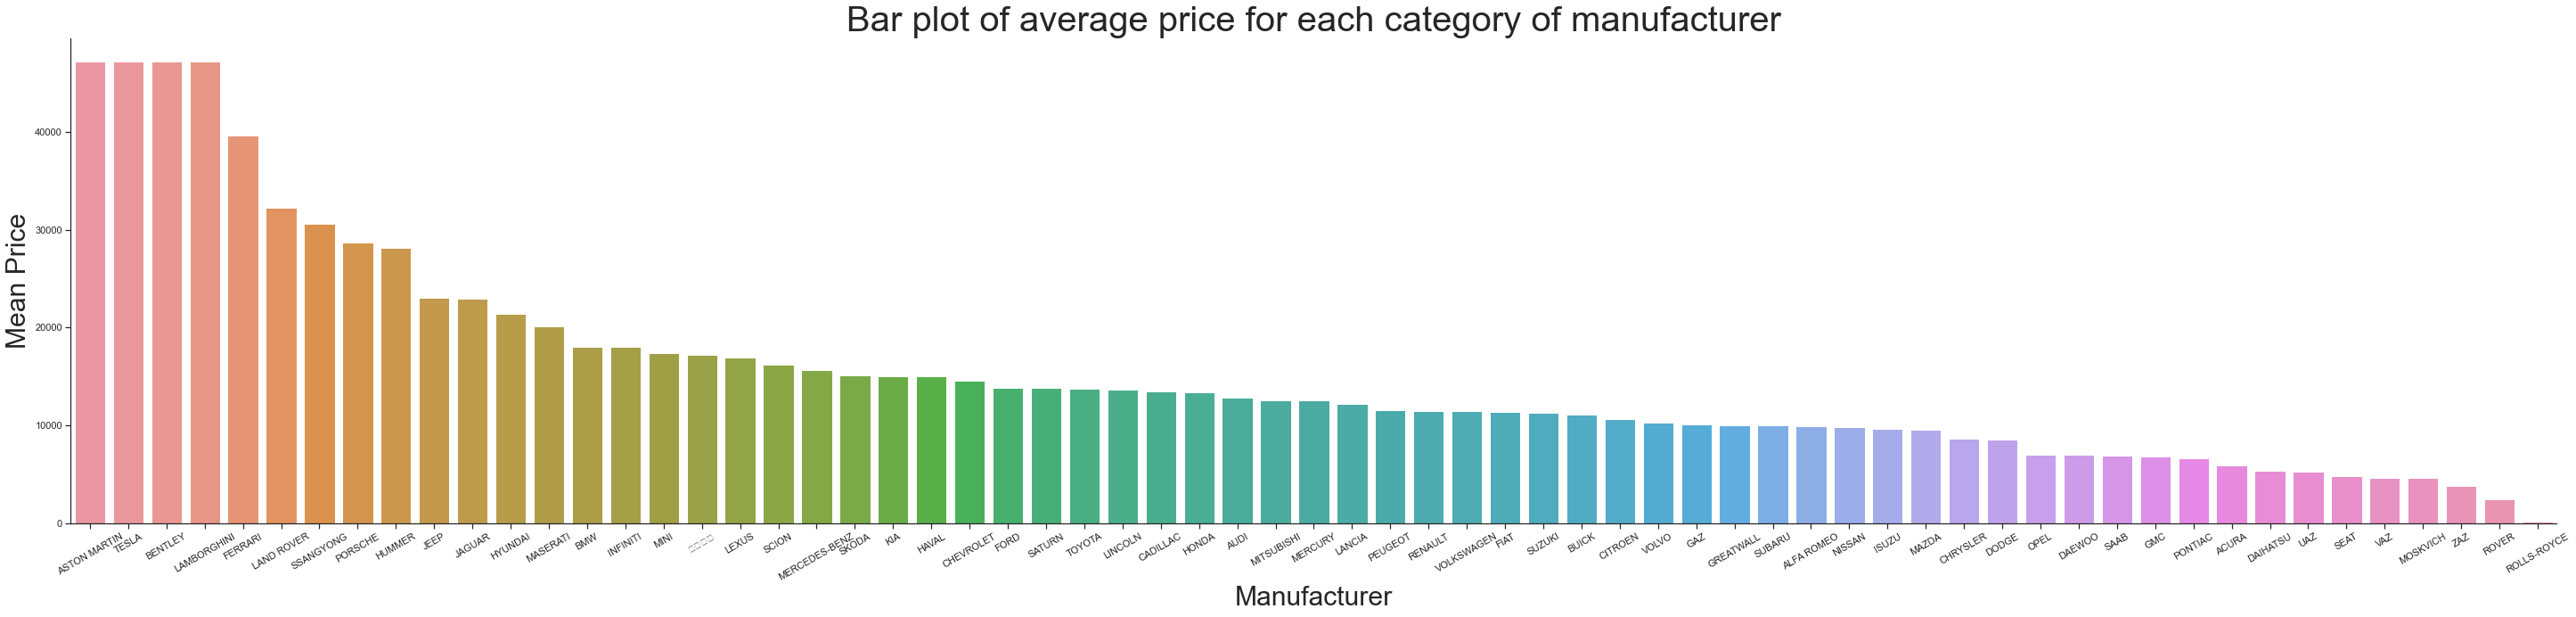

In [ ]:
# Create the dataframe
df1 = df[['price', 'manufacturer']].groupby(by= ['manufacturer'], as_index=False).agg('mean').sort_values(by='price', ascending=False)

# Lets barplot for each categorical columns
plt.figure(figsize=(50,10))

plot = sns.barplot(x="manufacturer", y="price", data=df1)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
plt.title('Bar plot of average price for each category of manufacturer', fontsize=40)
plt.xlabel('Manufacturer', fontsize=30)
plt.ylabel('Mean Price', fontsize=30)

# #Drawing a horizontal for each quantile
# for i in list(df1["price"].quantile([0,0.25,0.5,0.75, 1.00])):
#     plot.axhline(i)

plt.show()

**Conclusions:** From the above bar plots of mean price of cars we make the following conclusions.
The Average price for the following manufacturer is highest.
- Aston Martin
- Testla
- Bentley
- Lamborghini

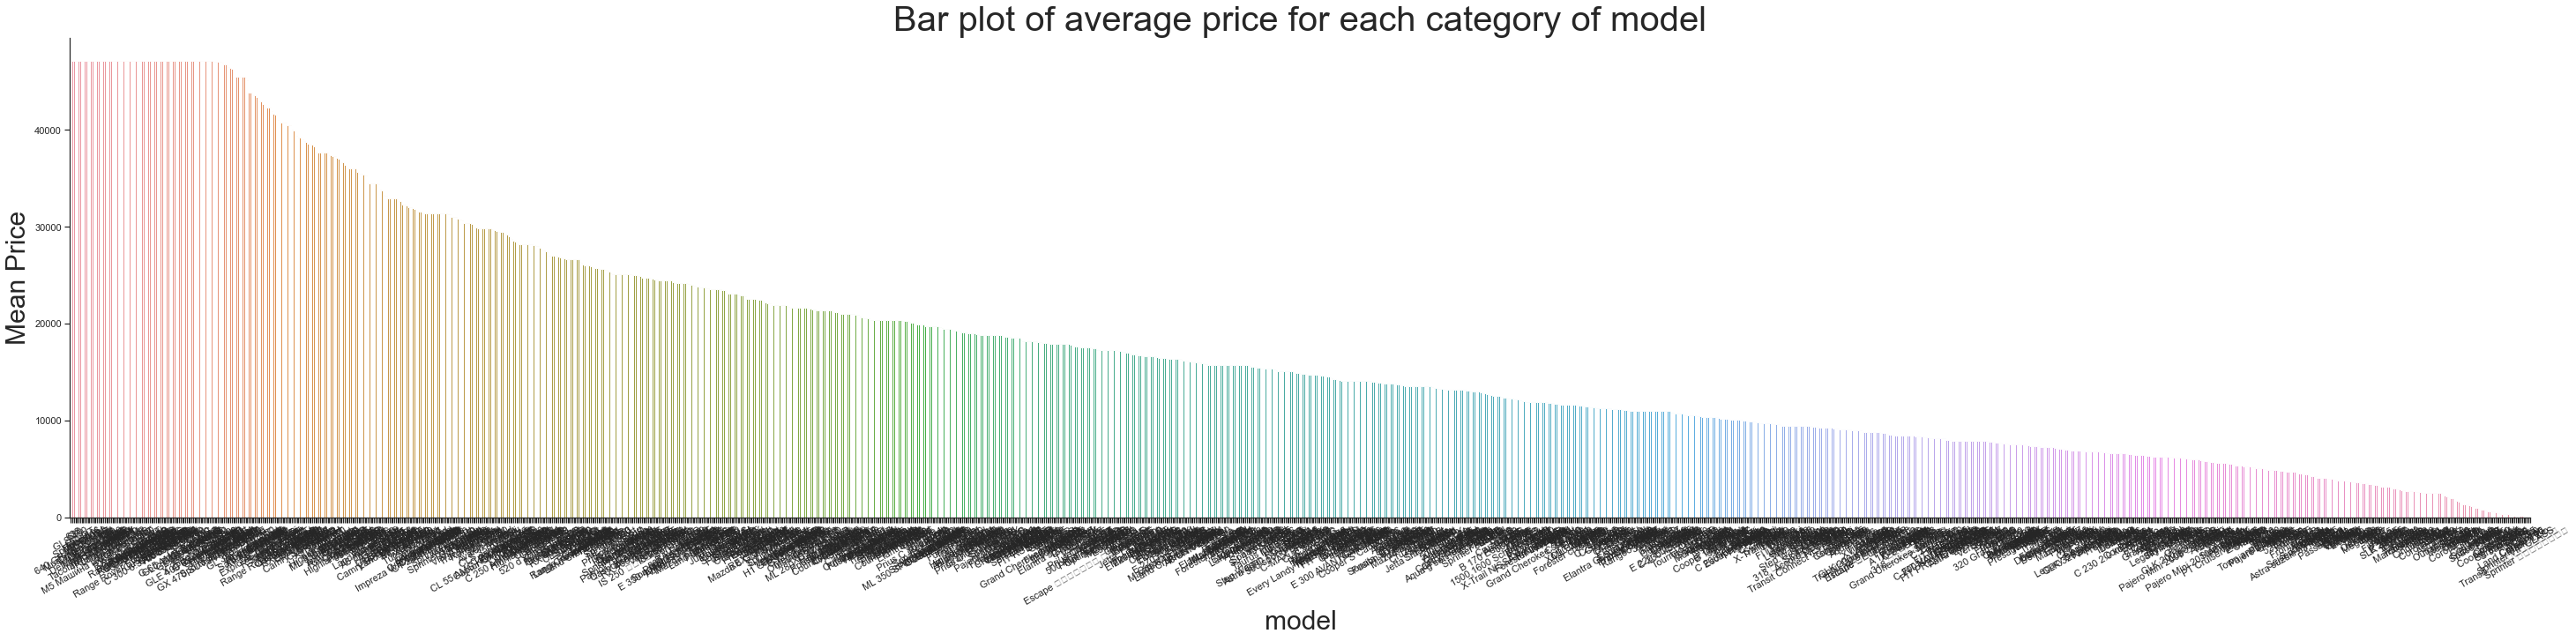

In [ ]:
# Create the dataframe
df1 = df[['price', 'model']].groupby(by= ['model'], as_index=False).agg('mean').sort_values(by='price', ascending=False)

# Lets barplot for each categorical columns
plt.figure(figsize=(50,10))

plot = sns.barplot(x="model", y="price", data=df1[:])
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='center')
plt.title('Bar plot of average price for each category of model', fontsize=40)
plt.xlabel('model', fontsize=30)
plt.ylabel('Mean Price', fontsize=30)

# #Drawing a horizontal for each quantile
# for i in list(df1["price"].quantile([0,0.25,0.5,0.75, 1.00])):
#     plot.axhline(i)

plt.show()

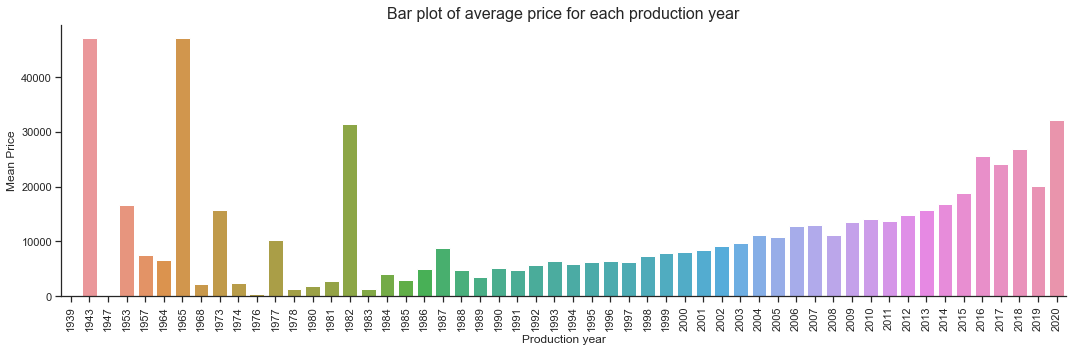

In [ ]:
# Create the dataframe
df1 = df[['price', 'prd_yr']].groupby(by= ['prd_yr'], as_index=False).agg('mean').sort_values(by='price', ascending=False)

# Lets barplot for each categorical columns
plt.figure(figsize=(18,5))
plot = sns.barplot(x="prd_yr", y="price", data=df1)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('Bar plot of average price for each production year', fontsize=16)
plt.xlabel('Production year', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.show()

In [ ]:
# The cars from 1973, 1977, 1982, 1987
df1 = df[(df['prd_yr'] == 1973) | (df['prd_yr'] == 1977) | (df['prd_yr'] == 1982) | (df['prd_yr'] == 1987)].sort_values(by='price', ascending=False)
df1

price  levy   manufacturer         model  prd_yr   category  \
14297  31361.0   0.0         SUZUKI       Samurai    1982       Jeep   
14175  20385.0   0.0  MERCEDES-BENZ  G 230 2.2cdi    1987       Jeep   
457    15681.0   0.0            GAZ         32214    1977  Limousine   
17634  15681.0   0.0      CHEVROLET        Impala    1973  Limousine   
9540   10036.0   0.0            UAZ         31514    1987       Jeep   
6303    6899.0   0.0            UAZ         31514    1987   Microbus   
17281   5000.0   0.0            VAZ          2106    1977      Sedan   
13190   4000.0   0.0            UAZ         31514    1987       Jeep   
16083   2822.0   0.0  MERCEDES-BENZ         A 190    1987      Sedan   

      leather_intr fuel_typ  engine_vol  mileage(km)  cylinders   gear_box  \
14297           No   Petrol        0.80      29500.0        3.0     Manual   
14175           No   Diesel        2.20     243567.0        4.0     Manual   
457             No   Petrol        2.40      11111.0        6.0     Manual   
17634          Yes   Petrol        3.55     100000.0        8.0  Automatic   
9540           Yes   Petrol        2.00          0.0        4.0     Manual   
6303            No      CNG        2.40     354000.0        4.0     Manual   
17281           No   Petrol        1.60      37500.0        4.0     Manual   
13190           No   Petrol        2.90     120000.0        4.0     Manual   
16083           No   Petrol        2.00     240000.0        4.0     Manual   

      drive_wheels doors       wheel     color  airbags  engine_turbo  
14297          4x4   2-3  Left wheel      Blue      1.0             0  
14175          4x4   4-5  Left wheel     Black      0.0             0  
457           Rear   4-5  Left wheel     Black      0.0             0  
17634         Rear   4-5  Left wheel     Brown      0.0             0  
9540           4x4   4-5  Left wheel     Green      4.0             0  
6303           4x4   4-5  Left wheel     Green      6.0             0  
17281         Rear   4-5  Left wheel  Sky blue      0.0             0  
13190          4x4   4-5  Left wheel      Blue      9.0             0  
16083         Rear   4-5  Left wheel     Green      0.0             0

**Conclusions:** From the above bar plots of mean price of cars we make the following conclusions.
- Generally, the average price of cars is increasing every year. 
- In the year, 1973, 1977, 1982, the average price of the car is very highly unusual. It will act as outlier in our ML model, so its better to delete these values.

In [ ]:
# The price of cars that belogs to year 1973, 1977, 1982, 1987 and have price above 5000. 
df2 = df1[df1['price']>10000]
# Removing these values from our main dataset
df = df.drop(df2.index)

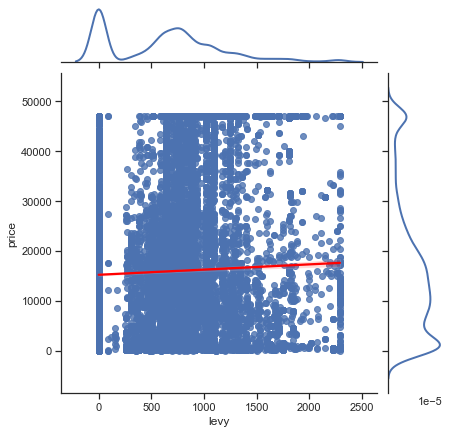

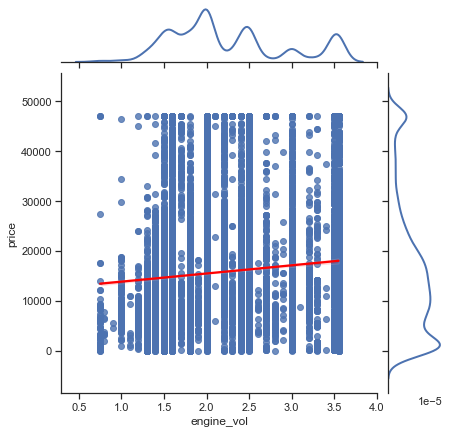

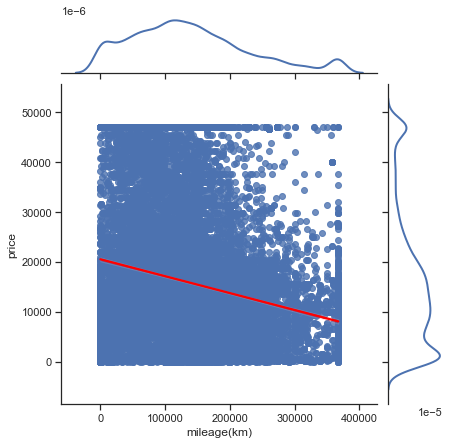

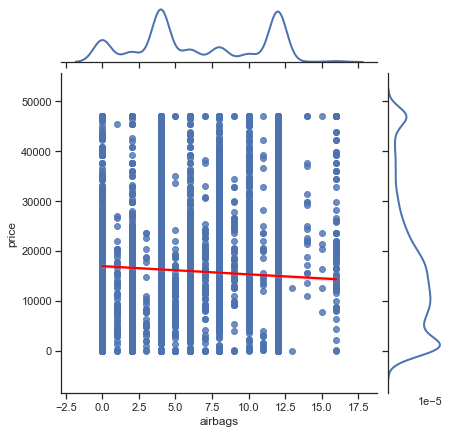

In [ ]:
# The jointplot of distribution, scatter plot, and the regression line of mean price and variour numercal columns is given below.
for col in cont_col[1:]:
    g = sns.JointGrid()
    sns.regplot(x=df[col], y=df["price"],line_kws={"color": "red"}, ax=g.ax_joint)
    sns.kdeplot(y=df["price"], linewidth=2, ax=g.ax_marg_y)
    sns.kdeplot(x=df[col], linewidth=2, ax=g.ax_marg_x)
    plt.show()

## Multi Variable Analysis

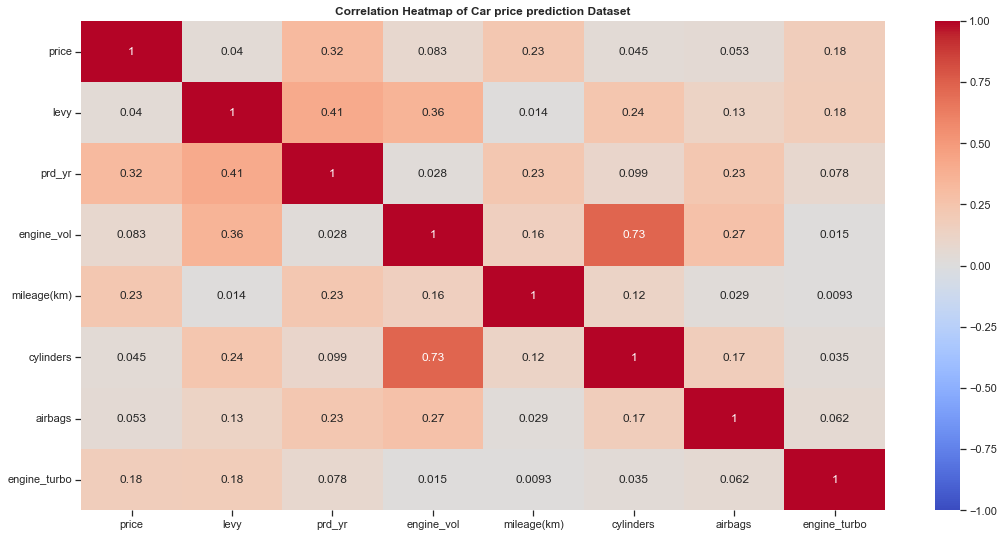

In [ ]:
# Correlation Analysis
plt.figure(figsize=(18,9))
plot = sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm',vmin=-1)
plt.title('Correlation Heatmap of Car price prediction Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

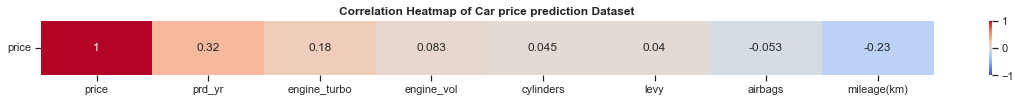

In [ ]:
# Correlation Analysis only for target variabel 
Target_corr  = df.corr().loc[:, 'price'].to_frame().sort_values(by = 'price' , ascending=False).T
plt.figure(figsize=(20,1))
plot = sns.heatmap(Target_corr, annot=True, cmap='coolwarm', vmin = -1)
plt.title('Correlation Heatmap of Car price prediction Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

**Conclusions:** From the above correlation heatmap, we make the following conclusions.
- The price has high positive correlation with production year, and engine turbo.
- The price has high negative correlation with mileage.
- The price has very little correlation with engine volume, cylinder, levy, and airbags.
- The produduction year and levy have high positive correlation.
- The engive vol and cylinder have high positive correlation.

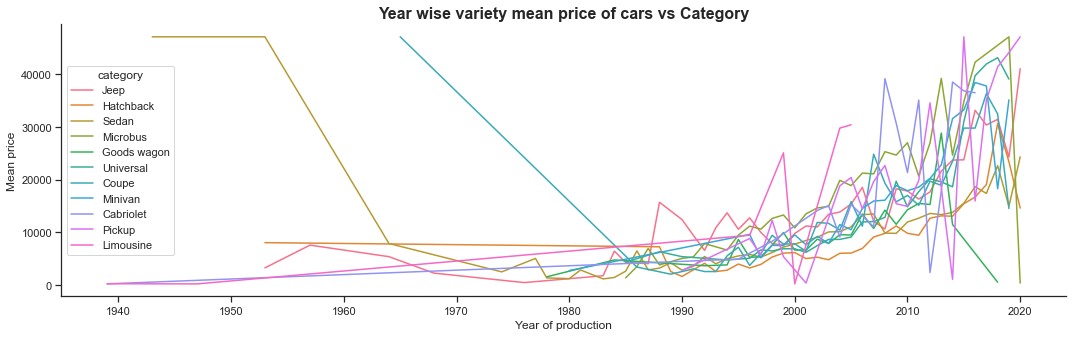

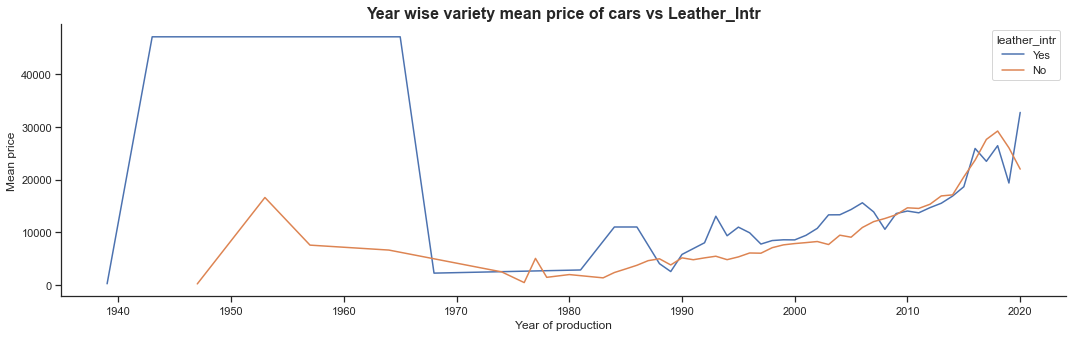

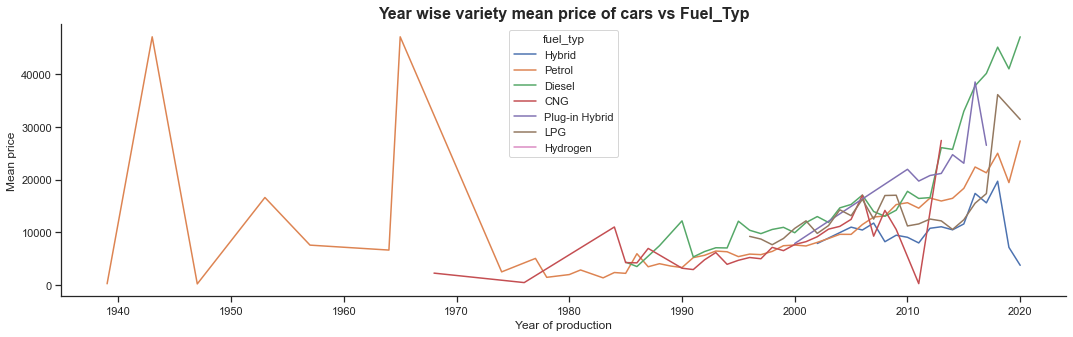

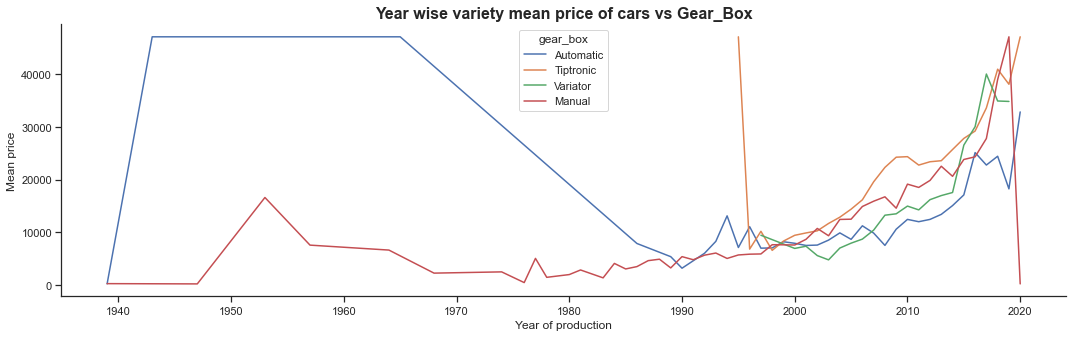

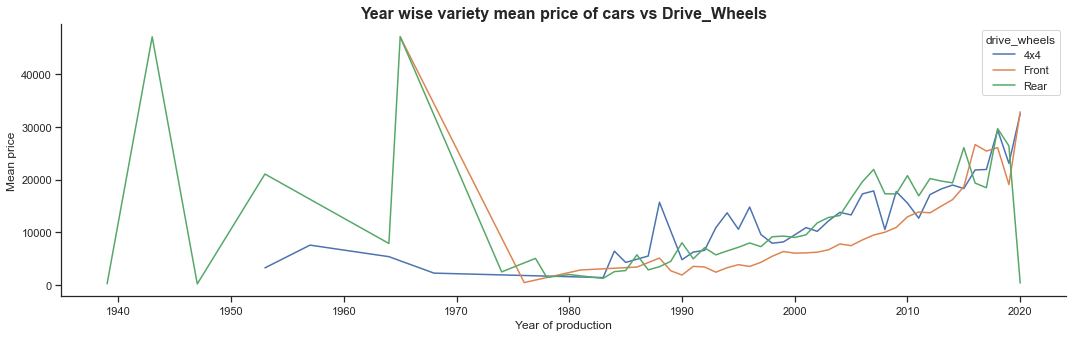

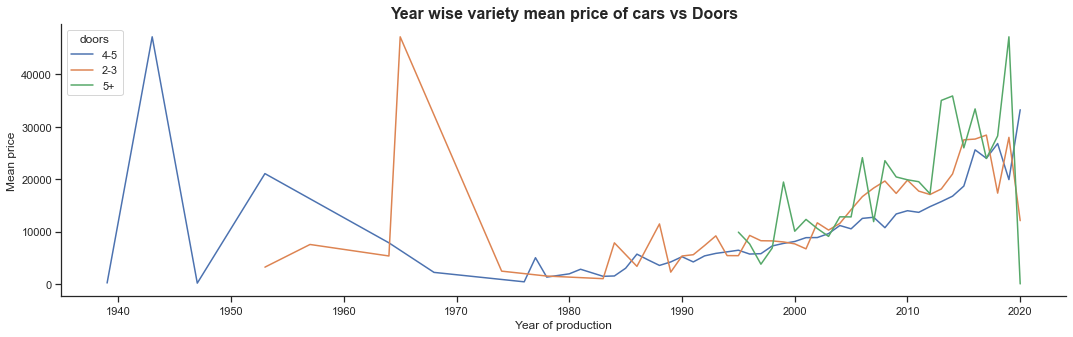

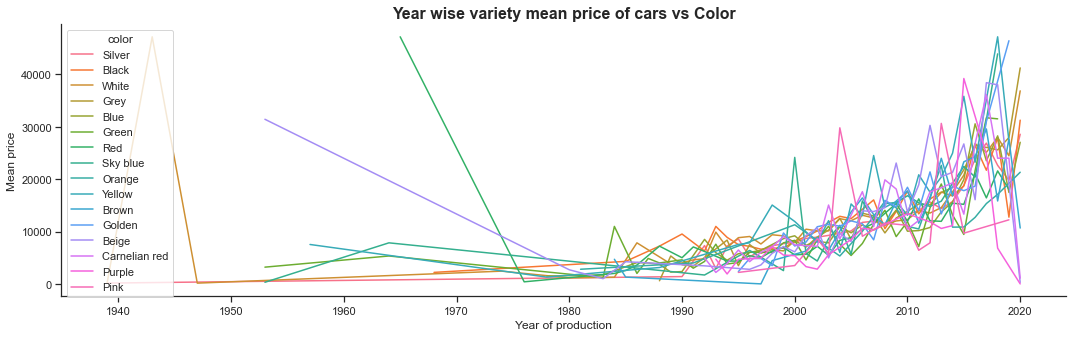

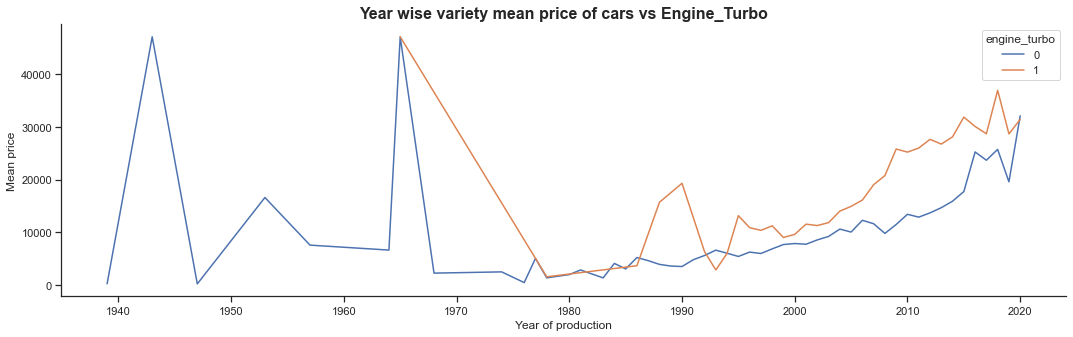

In [ ]:
# Plot the line chart 
for Hue in cat_col:
    plt.figure(figsize=(18,5))
    plot = sns.lineplot(x = 'prd_yr', y = 'price',  data = df, hue = Hue,ci=None)
    plt.title(f'Year wise variety mean price of cars vs {Hue.title()}', fontsize=16,weight='bold')
    plt.xlabel('Year of production', fontsize=12)
    plt.ylabel('Mean price', fontsize=12)
    plt.show()

**Conclusions:** From the above line plots of mean price of cars year wise we make the following conclusions.
- The average price of leather interior is always higher.
- Intially there were petrol fuel cars therefore the price of the petrol fuel cars were very high. But after aprox 1995 the average price of petrol cars become cheaper and diesel cars become costlier.
- Initally the average price of automatic gear box was so high but it become cheaper as the time passes.
- The 5+ door cars came after aprox 1995 and there average price were always higher.
- The average price of turbo engine is always higher.

#  <u>**Feature extraction and preparing the dataset** </u>

## Removing Multicolinearity

In [ ]:
# Check for the Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.set_index('Variables')

    return(vif)

In [ ]:
df_prepar = df.copy().drop(['price'], axis = 1)
print("VIF without removing anything:")
print(calc_vif(df_prepar[[i for i in df_prepar.describe().columns]]))
print("="*40+"||")
df_prepar = df_prepar.drop(['cylinders'], axis = 1)
print("VIF after removing 'cylinders'")
print(calc_vif(df_prepar[[i for i in df_prepar.describe().columns]]))

VIF without removing anything:
                    VIF
Variables              
levy           2.931734
prd_yr        17.751825
engine_vol    28.882986
mileage(km)    3.415502
cylinders     33.471335
airbags        3.632481
engine_turbo   1.164048
========================================||
VIF after removing 'cylinders'
                    VIF
Variables              
levy           2.930144
prd_yr        13.409287
engine_vol    14.852612
mileage(km)    3.415468
airbags        3.626076
engine_turbo   1.159125


## Feature engineering:
- Method 1: Using one hot incoding of top frequenct variables of Manufacture, Model.
- Method 2: Using target variables to create bins for model and manufacture.
- Method 3: Frequency label encoding of model and manufacture.

In [ ]:
# Create the new dataframe and drop collinear column
df_prepar = df.copy().drop(['price', 'cylinders'], axis = 1)

# Do label encoding for leather interior
df_prepar = df_prepar.replace({'leather_intr':{'Yes':1, 'No':0}})

# One hot encoding for the catagorical columns 
X = pd.get_dummies(df_prepar, columns=['category','fuel_typ','gear_box','drive_wheels','doors','wheel','color'], prefix=['category','fuel_typ','gear_box','drive_wheels','doors','wheel','color'])
y = df['price']

### Encodign: Using method 1
Using one hot incoding of top frequenct variables of Manufacture, Model.

In [ ]:
'''
Method 1: Using one hot incoding of top frequent variables of Manufacture, Model
'''

X_1 = X.copy()
# let's make a list with the most frequent categories of the variable

top_20_model = [y for y in df.model.value_counts().sort_values(ascending=False).head(20).index]
top_20_manufacturer = [y for y in df.manufacturer.value_counts().sort_values(ascending=False).head(20).index]
# top_20_prd_yr = [y for y in df.prd_yr.value_counts().sort_values(ascending=False).head(20).index]


# get whole set of dummy variables, for all the categorical variables
def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+str(label)] = np.where(df[variable]==label, 1, 0)

# encode X2 into the 10 most frequent categories
one_hot_encoding_top_x(X_1, 'model', top_20_model)
one_hot_encoding_top_x(X_1, 'manufacturer', top_20_manufacturer)
# one_hot_encoding_top_x(X_1, 'prd_yr', top_20_prd_yr)

# Drop manufacturer, model, and prd_yr
X_1 = X_1.drop(['manufacturer', 'model'], axis=1)
# X_1 = X_1.drop(['prd_yr'], axis=1)

X_1.head(5)

levy  prd_yr  leather_intr  engine_vol  mileage(km)  airbags  \
0  1399.0    2010             1         3.5     186005.0     12.0   
1  1018.0    2011             0         3.0     192000.0      8.0   
2     0.0    2006             0         1.3     200000.0      2.0   
3   862.0    2011             1         2.5     168966.0      0.0   
4   446.0    2014             1         1.3      91901.0      4.0   

   engine_turbo  category_Cabriolet  category_Coupe  category_Goods wagon  \
0             0                   0               0                     0   
1             0                   0               0                     0   
2             0                   0               0                     0   
3             0                   0               0                     0   
4             0                   0               0                     0   

   ...  manufacturer_SSANGYONG  manufacturer_KIA  manufacturer_OPEL  \
0  ...                       0                 0                  0   
1  ...                       0                 0                  0   
2  ...                       0                 0                  0   
3  ...                       0                 0                  0   
4  ...                       0                 0                  0   

   manufacturer_MITSUBISHI  manufacturer_SUBARU  manufacturer_AUDI  \
0                        0                    0                  0   
1                        0                    0                  0   
2                        0                    0                  0   
3                        0                    0                  0   
4                        0                    0                  0   

   manufacturer_MAZDA  manufacturer_JEEP  manufacturer_DAEWOO  \
0                   0                  0                    0   
1                   0                  0                    0   
2                   0                  0                    0   
3                   0                  0                    0   
4                   0                  0                    0   

   manufacturer_DODGE  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 93 columns]

### Encoding: Using method 2
Using target variables to create bins for model and manufacture.

In [ ]:
'''
Method 2: Using target variables to create bins for model and manufacture.
'''
X_2 = X.copy()

# let's make a list with the most frequent categories of the variable
top_20_prd_yr = [y for y in df.prd_yr.value_counts().sort_values(ascending=False).head(20).index]


# get whole set of dummy variables, for all the categorical variables
def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+str(label)] = np.where(df[variable]==label, 1, 0)

# encode X2 into the 20 most frequent categories
# one_hot_encoding_top_x(X_2, 'prd_yr', top_20_prd_yr)

# Target encoding for model and manufacture
def target_encoding(val):
    if 0 <= val and  val < 10000:
        return  1
    if 10000 <= val and  val < 20000:
        return  2
    if 20000 <= val and  val < 30000:
        return  3
    if 30000 <= val:
        return  4


# Target Encode for manufactuer
df1 = df[['price', 'manufacturer']].groupby(by= ['manufacturer'], as_index=False).agg('mean').sort_values(by='price', ascending=False)
df1['manufacturer_encode'] = df1['price'].apply(lambda x : target_encoding(x))

mapping = dict(df1[['manufacturer', 'manufacturer_encode']].values)
X_2['manufacturer_encode'] = df_prepar.manufacturer.map(mapping)


# Target Encode for model
df1 = df[['price', 'model']].groupby(by= ['model'], as_index=False).agg('mean').sort_values(by='price', ascending=False)
df1['model_encode'] = df1['price'].apply(lambda x : target_encoding(x))

mapping = dict(df1[['model', 'model_encode']].values)
X_2['model_encode'] = df_prepar.model.map(mapping)


# Drop manufacturer, model, and prd_yr
X_2 = X_2.drop(['manufacturer', 'model'], axis=1)
# X_2 = X_2.drop(['prd_yr'], axis=1)
X_2.head()

levy  prd_yr  leather_intr  engine_vol  mileage(km)  airbags  \
0  1399.0    2010             1         3.5     186005.0     12.0   
1  1018.0    2011             0         3.0     192000.0      8.0   
2     0.0    2006             0         1.3     200000.0      2.0   
3   862.0    2011             1         2.5     168966.0      0.0   
4   446.0    2014             1         1.3      91901.0      4.0   

   engine_turbo  category_Cabriolet  category_Coupe  category_Goods wagon  \
0             0                   0               0                     0   
1             0                   0               0                     0   
2             0                   0               0                     0   
3             0                   0               0                     0   
4             0                   0               0                     0   

   ...  color_Orange  color_Pink  color_Purple  color_Red  color_Silver  \
0  ...             0           0             0          0             1   
1  ...             0           0             0          0             0   
2  ...             0           0             0          0             0   
3  ...             0           0             0          0             0   
4  ...             0           0             0          0             1   

   color_Sky blue  color_White  color_Yellow  manufacturer_encode  \
0               0            0             0                    2   
1               0            0             0                    2   
2               0            0             0                    2   
3               0            1             0                    2   
4               0            0             0                    2   

   model_encode  
0             1  
1             1  
2             2  
3             1  
4             2  

[5 rows x 55 columns]

### Encoding: Using method 3
Frequency label encoding of model and manufacture.

In [ ]:
'''
Method 3: Frequency label encoding of model and manufacture.
'''
X_3 = X.copy()

# # let's make a list with the most frequent categories of the variable
# top_20_prd_yr = [y for y in df.prd_yr.value_counts().sort_values(ascending=False).head(20).index]

# # encode X3 into the 20 most frequent categories
# one_hot_encoding_top_x(X_3, 'prd_yr', top_20_prd_yr)

# Frequncy encoding for model and manufacture
labelencoder = LabelEncoder()
X_3['manufacturer']=labelencoder.fit_transform(X_3['manufacturer'])
X_3['model']=labelencoder.fit_transform(X_3['model'])
# X_3 = X_3.drop(['prd_yr'], axis=1)

X_3.head()

levy  manufacturer  model  prd_yr  leather_intr  engine_vol  mileage(km)  \
0  1399.0            32   1240    2010             1         3.5     186005.0   
1  1018.0             8    657    2011             0         3.0     192000.0   
2     0.0            21    683    2006             0         1.3     200000.0   
3   862.0            16    660    2011             1         2.5     168966.0   
4   446.0            21    683    2014             1         1.3      91901.0   

   airbags  engine_turbo  category_Cabriolet  ...  color_Green  color_Grey  \
0     12.0             0                   0  ...            0           0   
1      8.0             0                   0  ...            0           0   
2      2.0             0                   0  ...            0           0   
3      0.0             0                   0  ...            0           0   
4      4.0             0                   0  ...            0           0   

   color_Orange  color_Pink  color_Purple  color_Red  color_Silver  \
0             0           0             0          0             1   
1             0           0             0          0             0   
2             0           0             0          0             0   
3             0           0             0          0             0   
4             0           0             0          0             1   

   color_Sky blue  color_White  color_Yellow  
0               0            0             0  
1               0            0             0  
2               0            0             0  
3               0            1             0  
4               0            0             0  

[5 rows x 55 columns]

#  <u>**Machine learning** </u>

## Defining some functions

In [ ]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test, plotgraph = True):

    '''Takes regressor model and train test splits as input and prints the
    evaluation matrices with the plot and returns the model'''

    # Fitting the model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    a,p = y_test,y_pred

    # Calculating Evaluation Matrix
    mse = mean_squared_error(a,p)
    rmse = np.sqrt(mse)
    r2 = r2_score(a,p)
    try:
        try:
            importance = model.feature_importances_
            feature = independent_variables
        except:
            importance = np.abs(model.coef_)
            feature = independent_variables
        indices = np.argsort(importance)
        indices = indices[::-1]
    except:
        pass

    # Printing Evaluation Matrix
    print("MSE         :" , round(mse,2))
    print("RMSE        :" , round(rmse,2))
    print("MAE         :" , round(mean_absolute_error(a,p),2))
    print("Train R2    :" , round(r2_score(y_train,model.predict(X_train)),2) ) 
    print("Test R2     :" , round(r2,2))
    print("Adjusted R2 :", round(1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)),2) )
    
    if plotgraph:
        # Plotting actual and predicted values and the feature importances:
        plt.figure(figsize=(18,6))

        plt.plot((y_pred)[:100])
        plt.plot((np.array(y_test)[:100]))
        plt.legend(["Predicted","Actual"])
        plt.title('Actual and Predicted Car Price')
        plt.show()
        try:
            plt.figure(figsize=(18,6))
            plt.bar(range(len(indices)),importance[indices])
            plt.xticks(range(len(indices)), [feature[i] for i in indices],  rotation=90,horizontalalignment='center')

            plt.title('Feature Importance')
            plt.tight_layout()
            plt.show()
        except:
            pass


    return model

##  <u>**Apply Machine learning algorithms using encoding method 1** </u>

###  **Split the data: Encoding Method 1:**

In [ ]:
# Let get the independent_variables data
X = X_1.copy()

# Define the independent_variables
independent_variables = [i for i in X.columns]

# Split the data in train and  test
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 20)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

###  **Regression algorithm: Encoding Method 1:**

MSE         : 99276688.72
RMSE        : 9963.77
MAE         : 7550.94
Train R2    : 0.44
Test R2     : 0.45
Adjusted R2 : 0.43


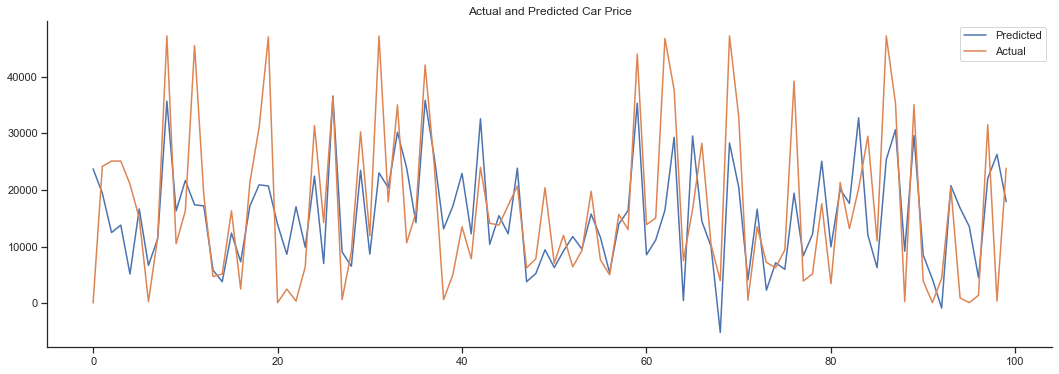

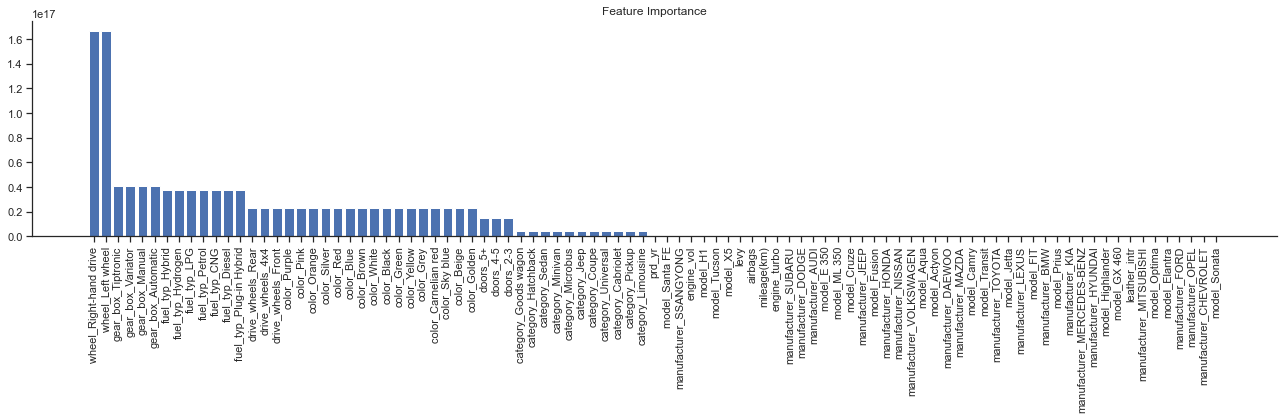

LinearRegression()

In [ ]:
# Fitting Linear Regression Model
lr1 = LinearRegression()
analyse_model(lr1, X_train, X_test, y_train, y_test)

###  **Random Forest: Encoding Method 1:**

MSE         : 37350156.73
RMSE        : 6111.48
MAE         : 3501.74
Train R2    : 0.96
Test R2     : 0.79
Adjusted R2 : 0.79


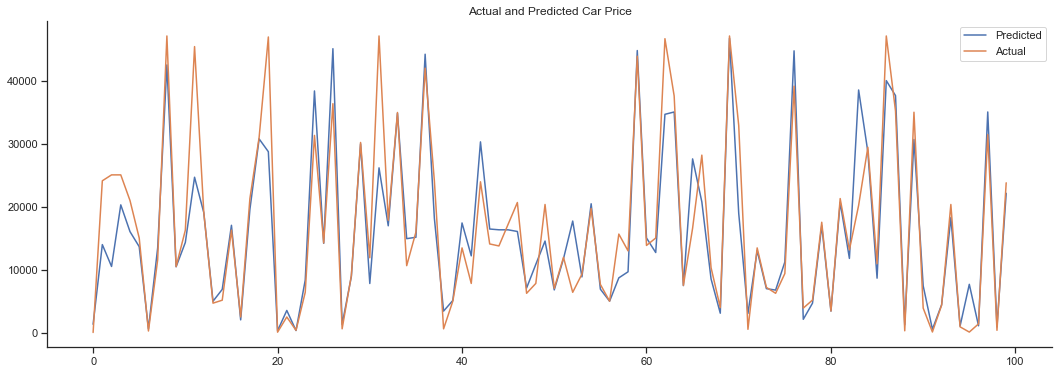

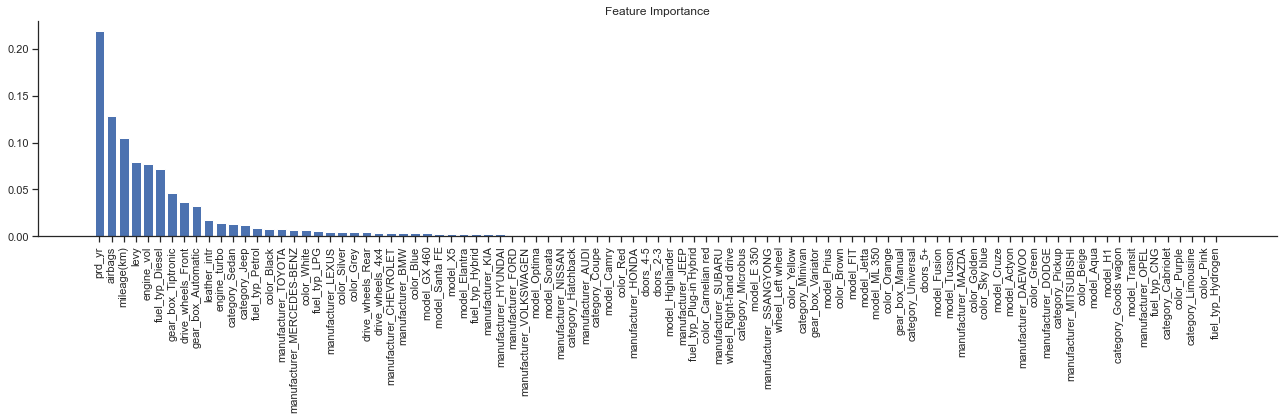

RandomForestRegressor(n_estimators=500, random_state=2)

In [ ]:
# Regressor
regressor = RandomForestRegressor(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [200,500,1000]}

# GridSearch to find the best parameters
rf1 = GridSearchCV(regressor, 
                  param_grid = grid, 
                  scoring = 'neg_mean_squared_error', 
                  cv=5,
                  n_jobs = -1)
rf1.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(rf1.best_estimator_, X_train, X_test, y_train, y_test)

###  **Gradient Boosting: Encoding Method 1:**

MSE         : 37667785.2
RMSE        : 6137.41
MAE         : 3649.08
Train R2    : 0.96
Test R2     : 0.79
Adjusted R2 : 0.79


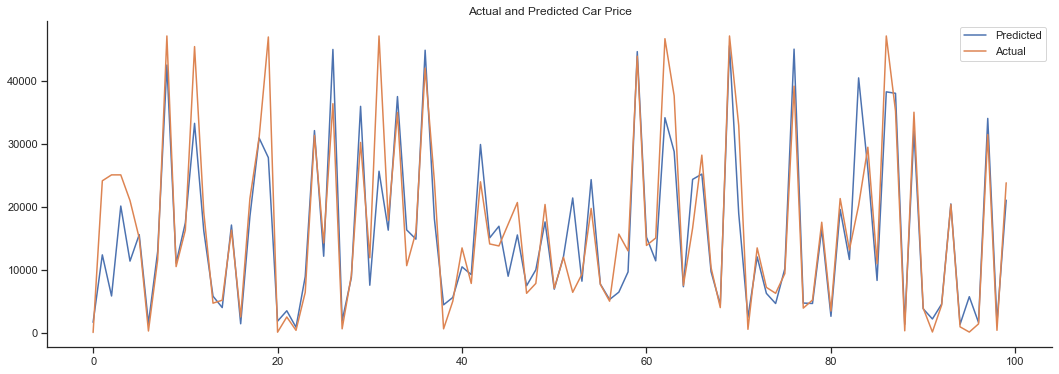

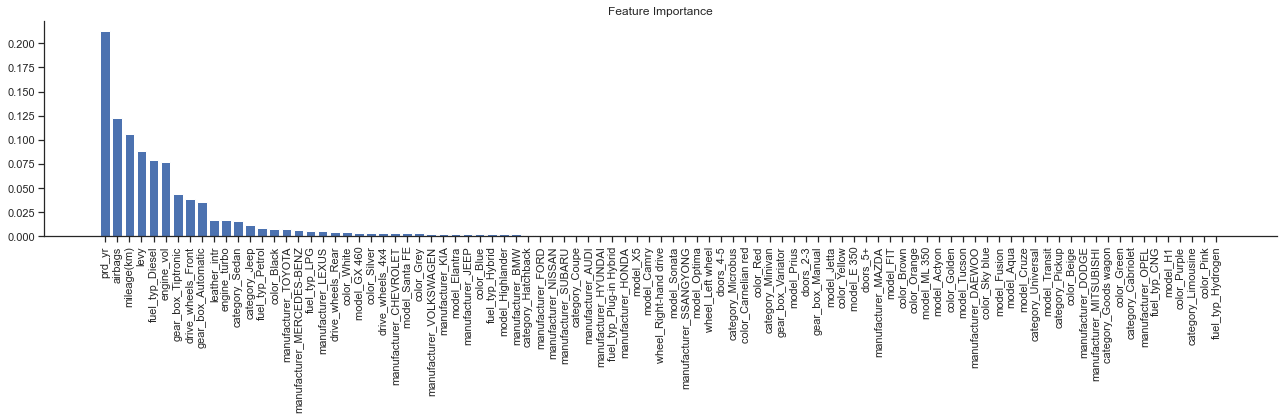

GradientBoostingRegressor(max_depth=10, n_estimators=150, random_state=4)

In [ ]:
# Regressor
regressor = GradientBoostingRegressor(random_state=4)

# HYperparameter Grid
grid = {'n_estimators' : [150,500],
        'max_depth' : [10,15]}

# GridSearch to find the best parameters
gbr1 = GridSearchCV(regressor, 
                   param_grid = grid, 
                   scoring = 'neg_mean_squared_error', 
                   cv=5,
                   n_jobs = -1)

gbr1.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(gbr1.best_estimator_, X_train, X_test, y_train, y_test)

###  **XGBoost: Encoding Method 1:**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
MSE         : 40525422.45
RMSE        : 6365.96
MAE         : 3737.18
Train R2    : 0.98
Test R2     : 0.77
Adjusted R2 : 0.77


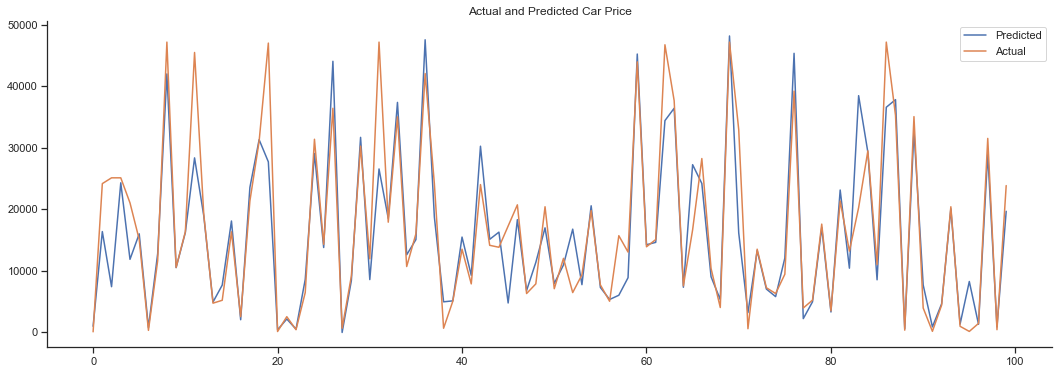

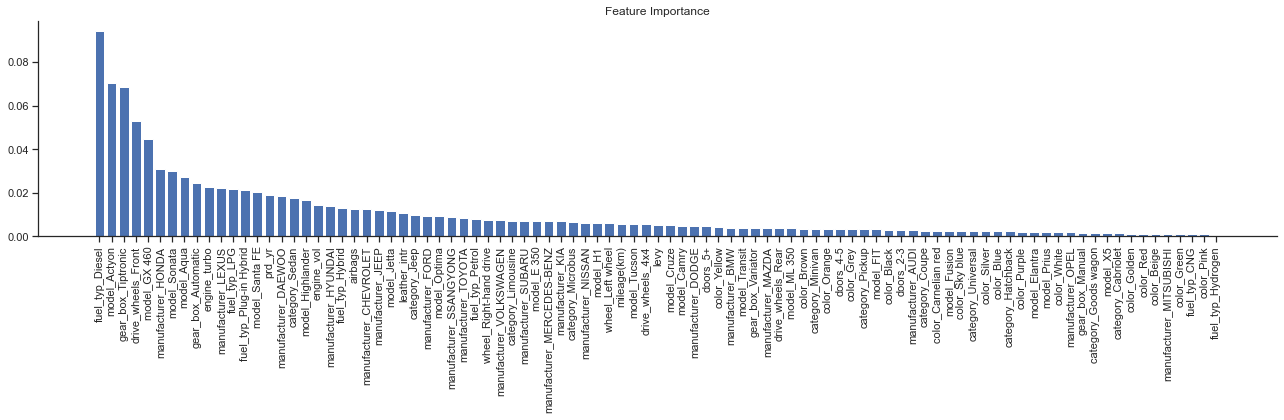

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
# Regressor
regressor = XGBRegressor()

# HYperparameter Grid
grid = {
    'max_depth': [10,15],
    'min_child_weight': [1,5],
    'colsample_bytree': [0.7,1],
    'n_estimators' : [150,500],
    'objective': ['reg:squarederror']
}


# GridSearch to find the best parameters
xgb1 = GridSearchCV(estimator = regressor,
                       param_grid = grid,                        
                       scoring = 'neg_mean_squared_error',
                       cv = 5,
                       n_jobs = -1,
                       verbose = 1)

# Fit the train data in the model
xgb1.fit(X_train,y_train)

# Analysing the model with best set of parametes
analyse_model(xgb1.best_estimator_, X_train, X_test, y_train, y_test)

###  **KNN Regressor: Encoding Method 1:**

Fitting 5 folds for each of 49 candidates, totalling 245 fits
MSE         : 69884882.44
RMSE        : 8359.72
MAE         : 5179.34
Train R2    : 0.77
Test R2     : 0.61
Adjusted R2 : 0.6


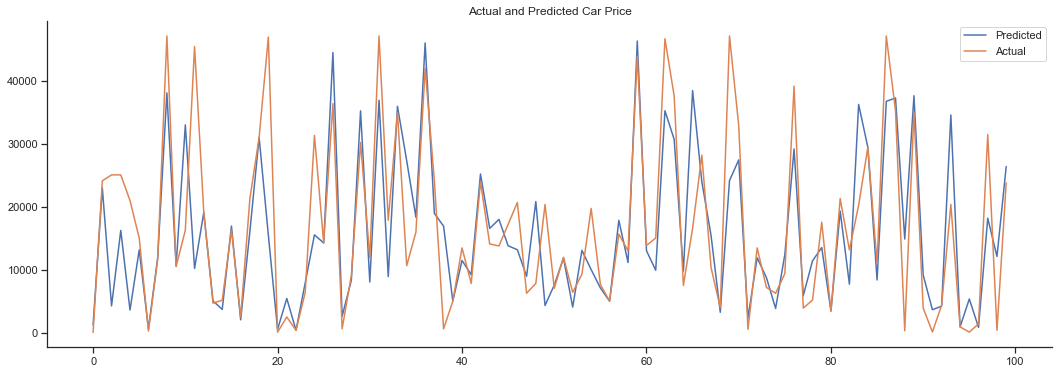

KNeighborsRegressor(n_neighbors=4)

<Figure size 1296x432 with 0 Axes>

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsRegressor()
# defining parameter range

knn_cv1= GridSearchCV(knn,param_grid,
                     cv=5,
                     n_jobs = -1,
                     scoring = 'neg_mean_squared_error',
                     verbose=1)
# fitting the model for grid search
knn_cv1.fit(X_train,y_train)

# Analysing the model with best set of parametes
analyse_model(knn_cv1.best_estimator_, X_train, X_test, y_train, y_test)

##  <u>**Apply Machine learning algorithms using encoding method 2** </u>

###  **Split the data: Encoding Method 2:**

In [ ]:
# Let get the independent_variables data
X = X_2.copy()

# Define the independent_variables
independent_variables = [i for i in X.columns]

# Split the data in train and  test
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 20)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

###  **Regression algorithm: Encoding Method 2:**

MSE         : 95766887.0
RMSE        : 9786.06
MAE         : 7378.53
Train R2    : 0.47
Test R2     : 0.47
Adjusted R2 : 0.46


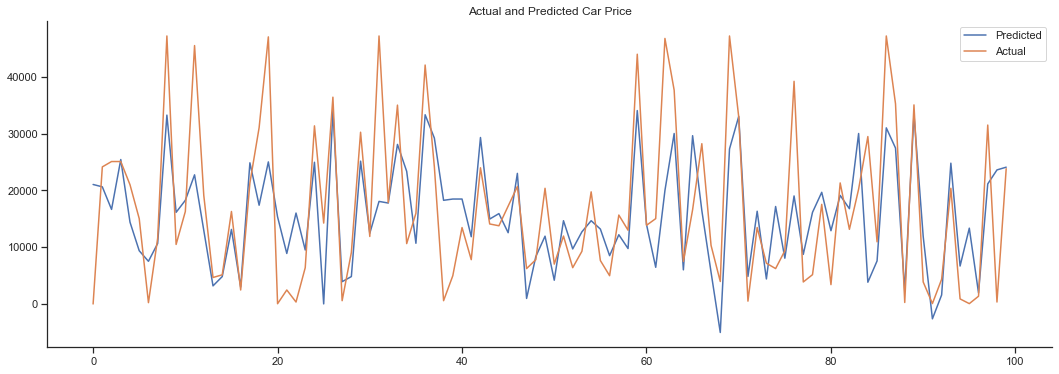

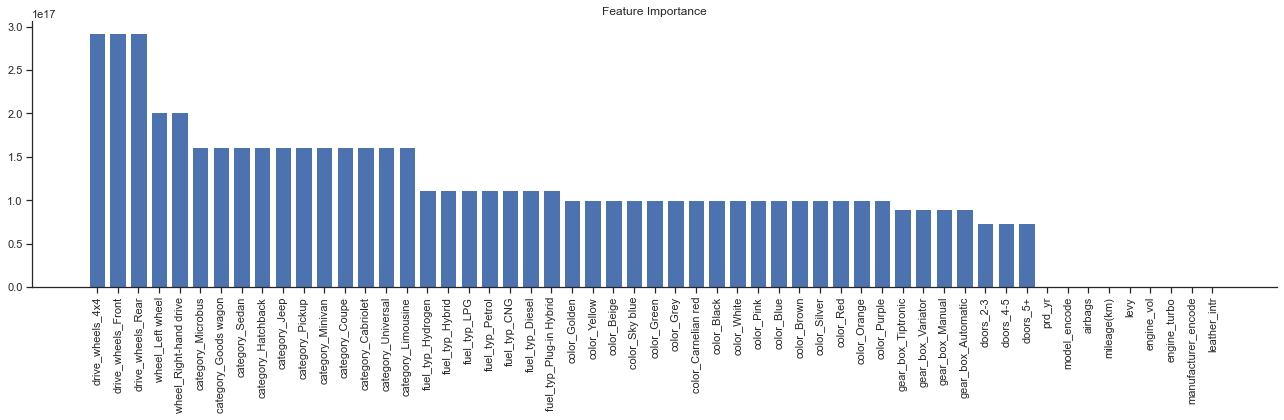

LinearRegression()

In [ ]:
# Fitting Linear Regression Model
lr2 = LinearRegression()
analyse_model(lr2, X_train, X_test, y_train, y_test)

###  **Random Forest: Encoding Method 2:**

MSE         : 37160981.19
RMSE        : 6095.98
MAE         : 3487.45
Train R2    : 0.96
Test R2     : 0.79
Adjusted R2 : 0.79


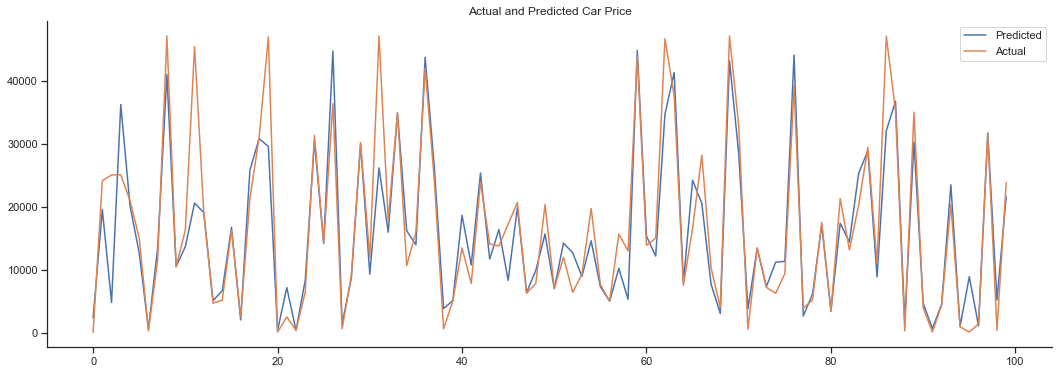

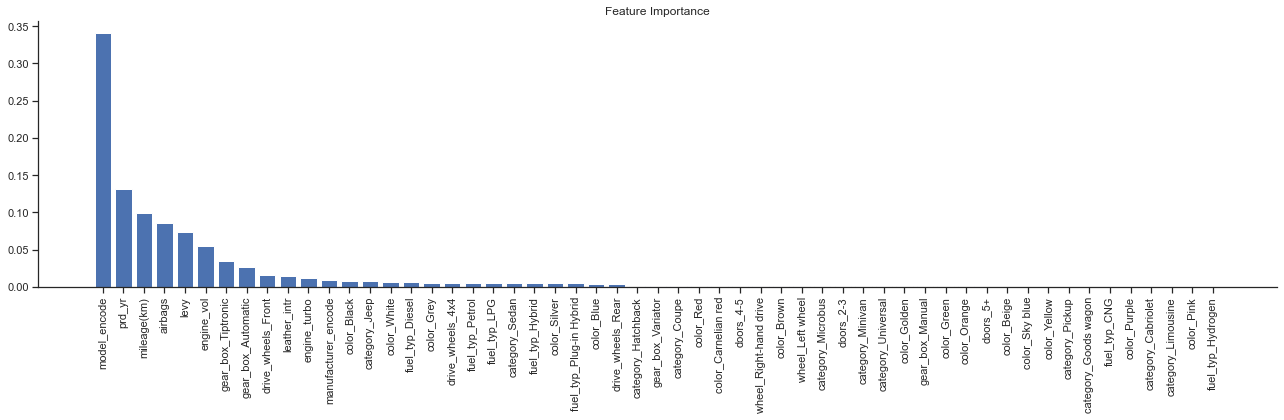

RandomForestRegressor(n_estimators=500, random_state=2)

In [ ]:
# Regressor
regressor = RandomForestRegressor(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [200,500,1000]}

# GridSearch to find the best parameters
rf2 = GridSearchCV(regressor, 
                  param_grid = grid, 
                  scoring = 'neg_mean_squared_error', 
                  cv=5,
                  n_jobs = -1)
rf2.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(rf2.best_estimator_, X_train, X_test, y_train, y_test)

###  **Gradient Boosting: Encoding Method 2:**

MSE         : 37922865.35
RMSE        : 6158.15
MAE         : 3616.98
Train R2    : 0.97
Test R2     : 0.79
Adjusted R2 : 0.79


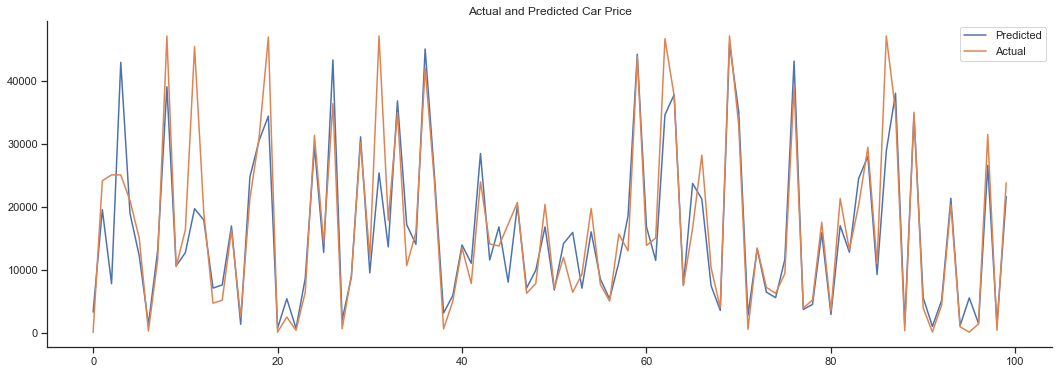

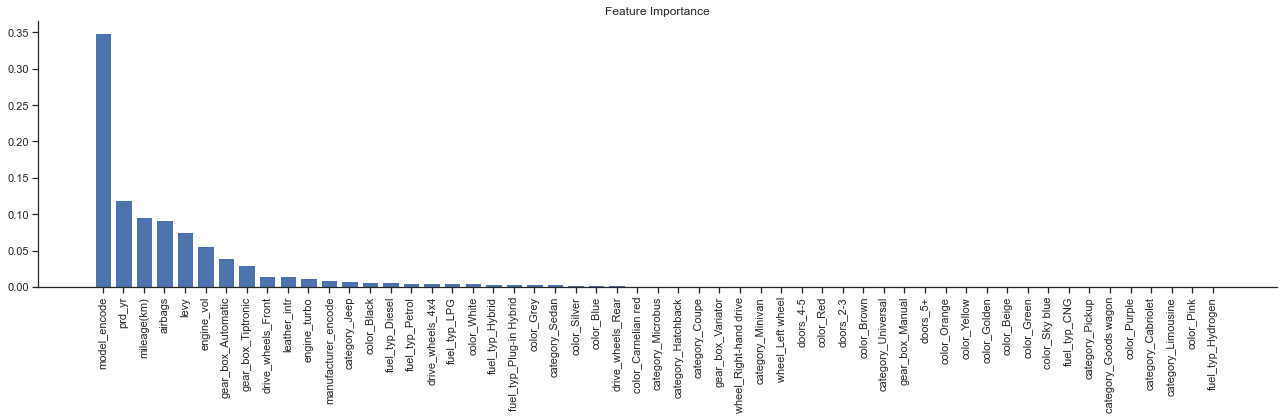

GradientBoostingRegressor(max_depth=10, n_estimators=150, random_state=4)

In [ ]:
# Regressor
regressor = GradientBoostingRegressor(random_state=4)

# HYperparameter Grid
grid = {'n_estimators' : [150,500],
        'max_depth' : [10,15]}

# GridSearch to find the best parameters
gbr2 = GridSearchCV(regressor, 
                   param_grid = grid, 
                   scoring = 'neg_mean_squared_error', 
                   cv=5,
                   n_jobs = -1)

gbr2.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(gbr2.best_estimator_, X_train, X_test, y_train, y_test)

###  **XGBoost: Encoding Method 2:**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
MSE         : 39205458.77
RMSE        : 6261.43
MAE         : 3661.65
Train R2    : 0.98
Test R2     : 0.78
Adjusted R2 : 0.78


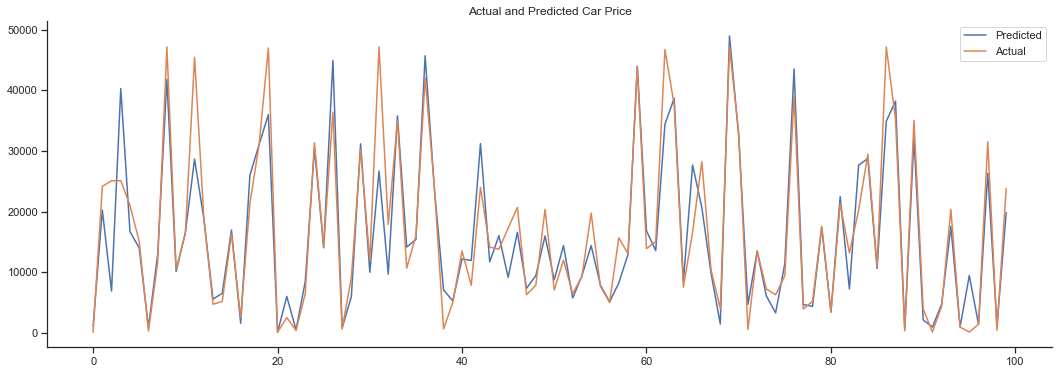

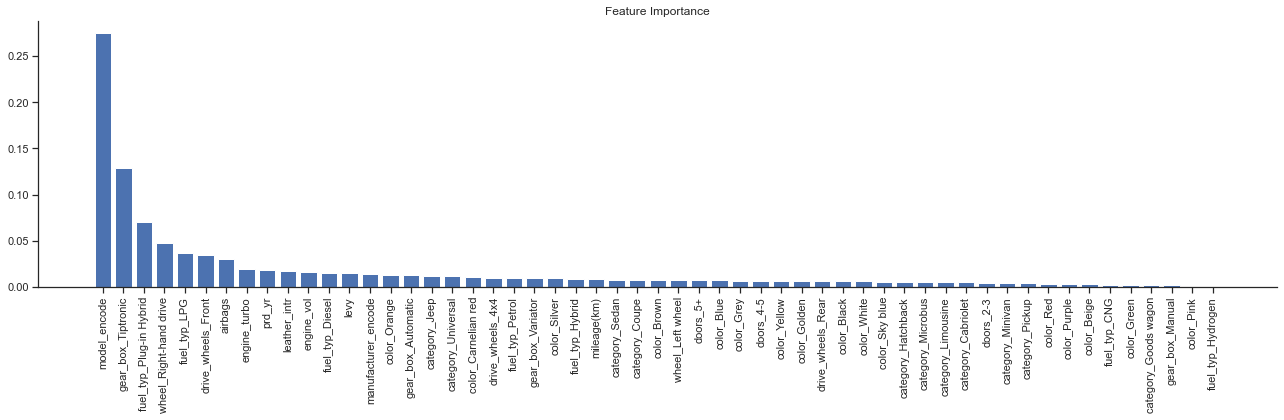

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
# Regressor
regressor = XGBRegressor()

# HYperparameter Grid
grid = {
    'max_depth': [10,15],
    'min_child_weight': [1,5],
    'colsample_bytree': [0.7,1],
    'n_estimators' : [150,500],
    'objective': ['reg:squarederror']
}


# GridSearch to find the best parameters
xgb2 = GridSearchCV(estimator = regressor,
                       param_grid = grid,                        
                       scoring = 'neg_mean_squared_error',
                       cv = 5,
                       n_jobs = -1,
                       verbose = 1)

# Fit the train data in the model
xgb2.fit(X_train,y_train)

# Analysing the model with best set of parametes
analyse_model(xgb2.best_estimator_, X_train, X_test, y_train, y_test)

###  **KNN Regressor: Encoding Method 2:**

Fitting 5 folds for each of 49 candidates, totalling 245 fits
MSE         : 65685781.86
RMSE        : 8104.68
MAE         : 5024.41
Train R2    : 0.79
Test R2     : 0.64
Adjusted R2 : 0.63


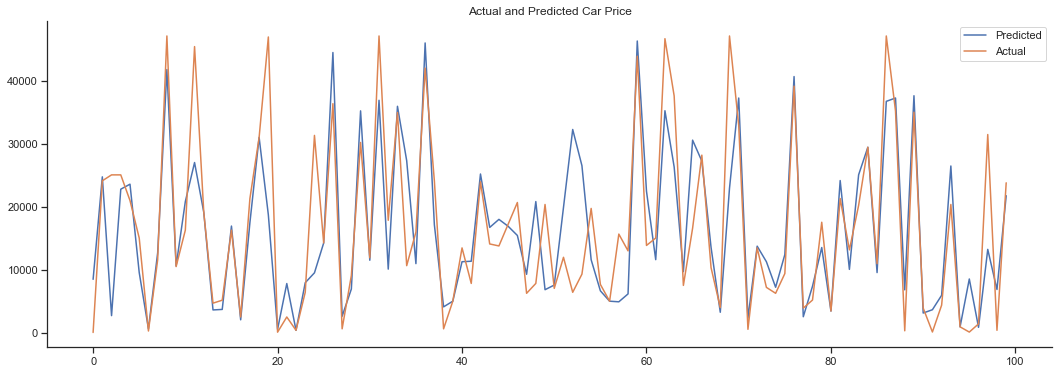

KNeighborsRegressor(n_neighbors=4)

<Figure size 1296x432 with 0 Axes>

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsRegressor()
# defining parameter range

knn_cv2= GridSearchCV(knn,param_grid,
                     cv=5,
                     n_jobs = -1,
                     scoring = 'neg_mean_squared_error',
                     verbose=1)
# fitting the model for grid search
knn_cv2.fit(X_train,y_train)

# Analysing the model with best set of parametes
analyse_model(knn_cv2.best_estimator_, X_train, X_test, y_train, y_test)

##  <u>**Apply Machine learning algorithms using encoding method 3** </u>

###  **Split the data: Encoding Method 3:**

In [ ]:
# Let get the independent_variables data
X = X_3.copy()

# Define the independent_variables
independent_variables = [i for i in X.columns]

# Split the data in train and  test
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 20)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

###  **Regression algorithm: Encoding Method 3:**

MSE         : 113584630.79
RMSE        : 10657.61
MAE         : 8173.37
Train R2    : 0.36
Test R2     : 0.37
Adjusted R2 : 0.36


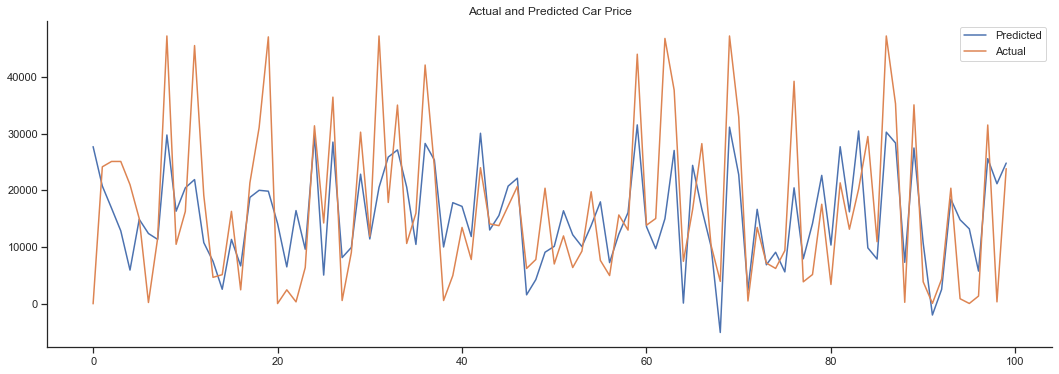

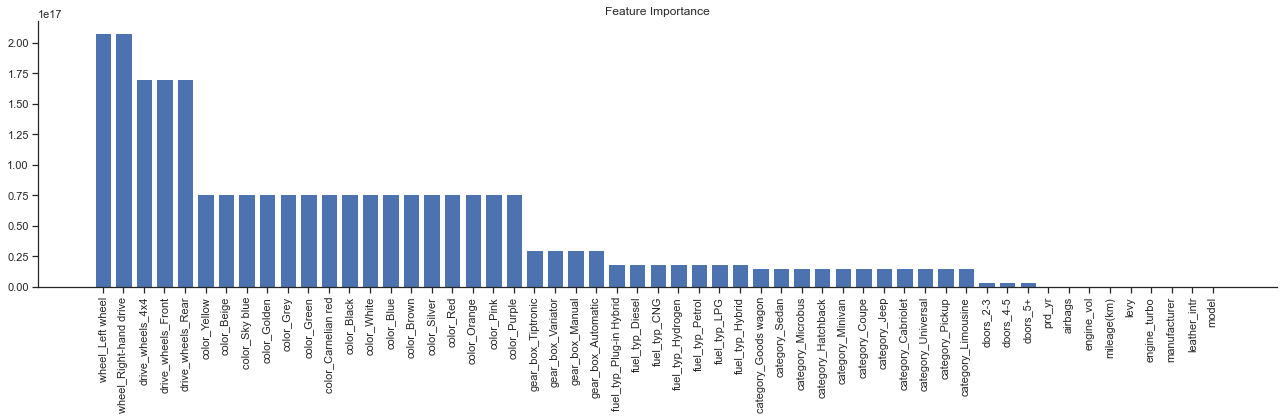

LinearRegression()

In [ ]:
# Fitting Linear Regression Model
lr3 = LinearRegression()
analyse_model(lr3, X_train, X_test, y_train, y_test)

###  **Random Forest: Encoding Method 3:**

MSE         : 36238890.65
RMSE        : 6019.87
MAE         : 3479.27
Train R2    : 0.96
Test R2     : 0.8
Adjusted R2 : 0.8


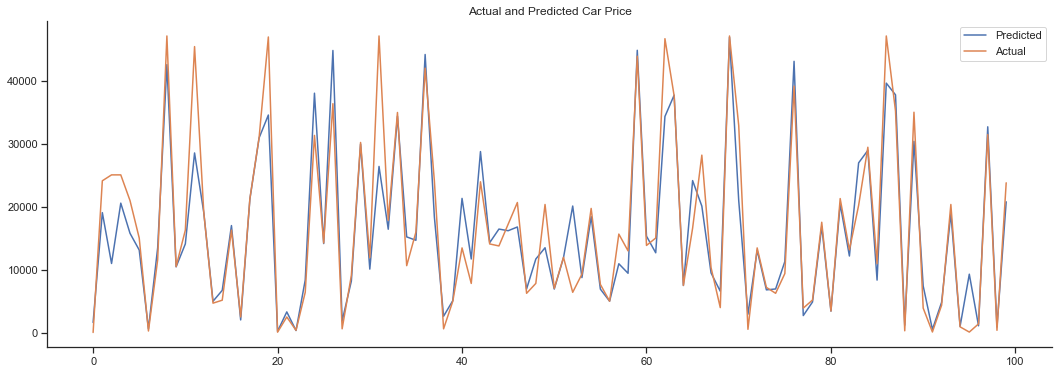

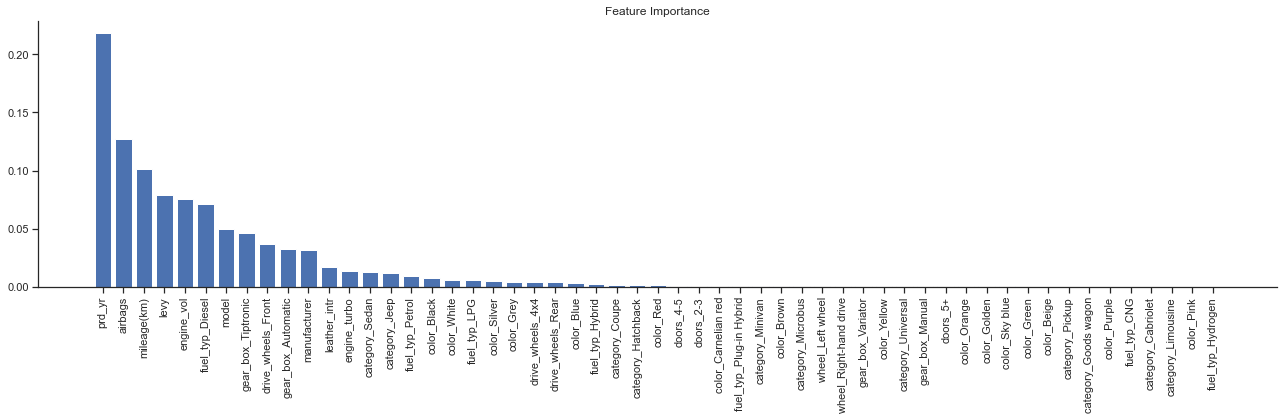

RandomForestRegressor(n_estimators=1000, random_state=2)

In [ ]:
# Regressor
regressor = RandomForestRegressor(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [200,500,1000]}

# GridSearch to find the best parameters
rf3 = GridSearchCV(regressor, 
                  param_grid = grid, 
                  scoring = 'neg_mean_squared_error', 
                  cv=5,
                  n_jobs = -1)
rf3.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(rf3.best_estimator_, X_train, X_test, y_train, y_test)

MSE         : 36232577.34
RMSE        : 6019.35
MAE         : 3481.66
Train R2    : 0.96
Test R2     : 0.8
Adjusted R2 : 0.8


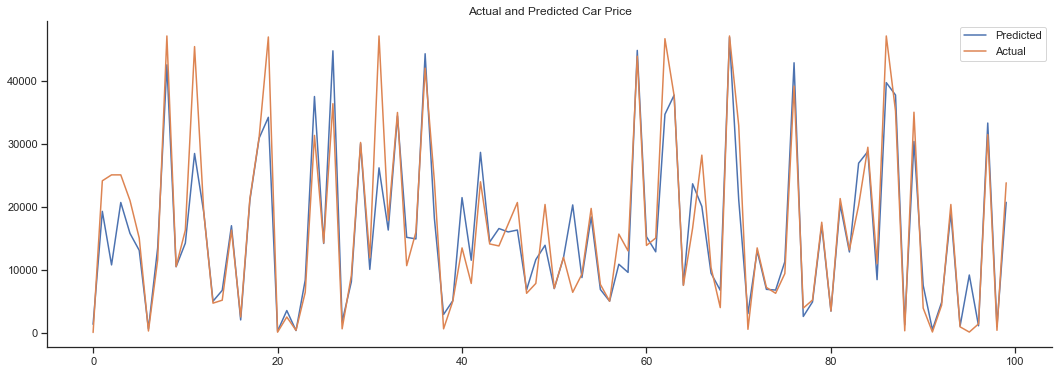

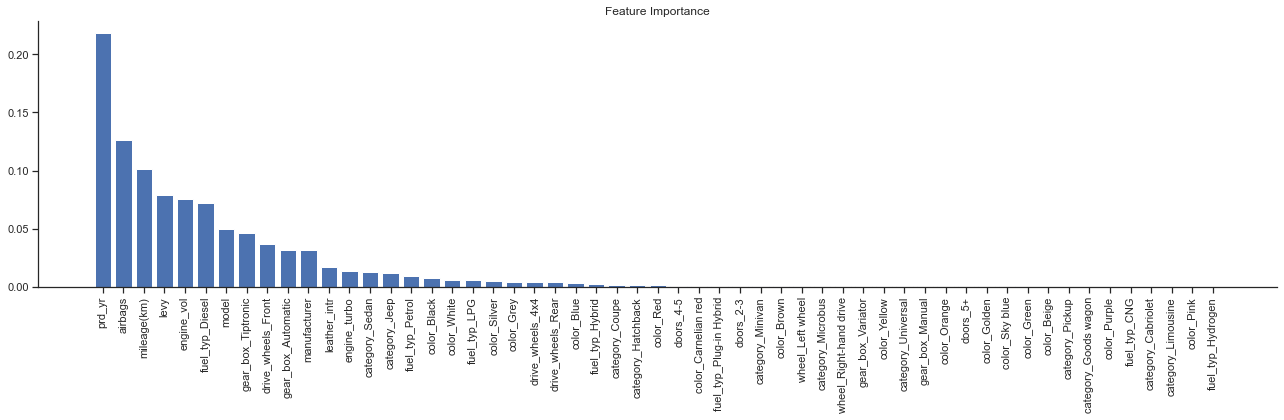

RandomForestRegressor(n_estimators=500, random_state=2)

In [ ]:
# Regressor
regressor = RandomForestRegressor(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : [200,500,1000]}

# GridSearch to find the best parameters
rf3 = GridSearchCV(regressor, 
                  param_grid = grid, 
                  scoring = 'neg_mean_squared_error', 
                  cv=5,
                  n_jobs = -1)
rf3.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(rf3.best_estimator_, X_train, X_test, y_train, y_test)




###  **Gradient Boosting: Encoding Method 3:**

MSE         : 36589433.46
RMSE        : 6048.92
MAE         : 3606.75
Train R2    : 0.97
Test R2     : 0.8
Adjusted R2 : 0.79


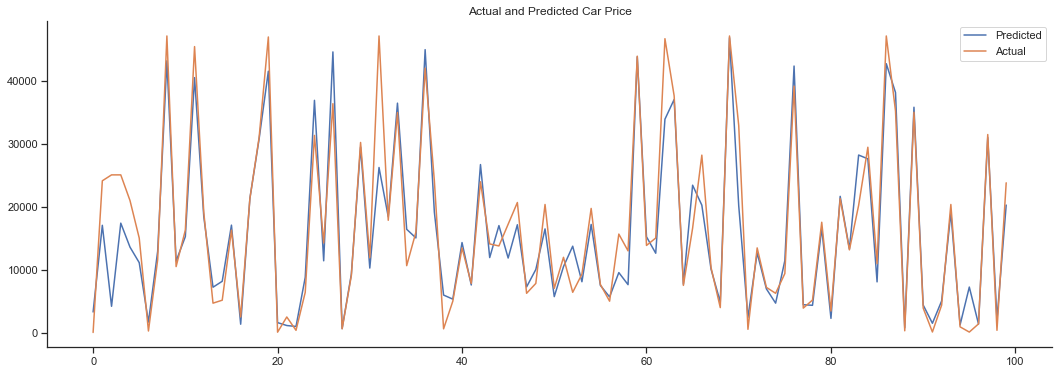

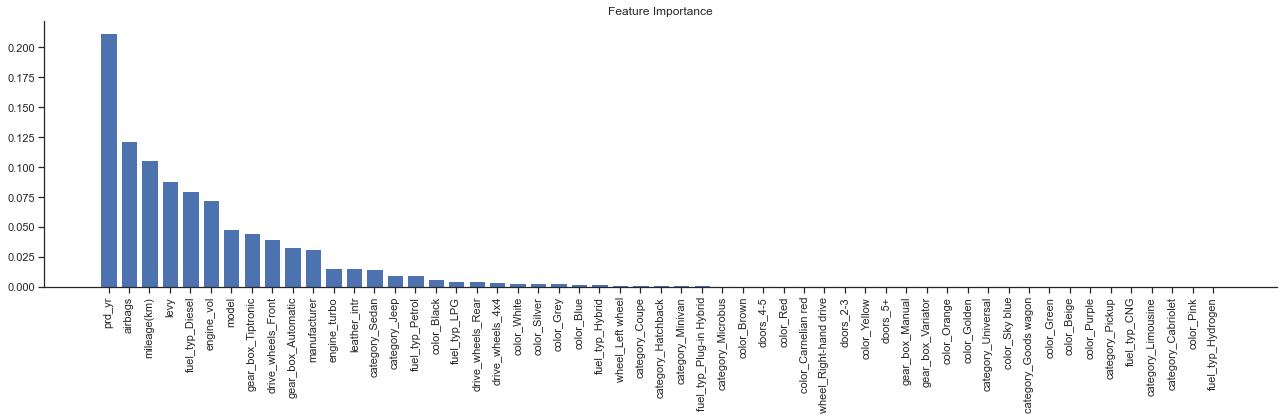

GradientBoostingRegressor(max_depth=10, n_estimators=150, random_state=4)

In [ ]:
# Regressor
regressor = GradientBoostingRegressor(random_state=4)

# HYperparameter Grid
grid = {'n_estimators' : [150,500],
        'max_depth' : [10,15]}

# GridSearch to find the best parameters
gbr3 = GridSearchCV(regressor, 
                   param_grid = grid, 
                   scoring = 'neg_mean_squared_error', 
                   cv=5,
                   n_jobs = -1)

gbr3.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(gbr3.best_estimator_, X_train, X_test, y_train, y_test)

###  **XGBoost: Encoding Method 3:**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
MSE         : 39389471.23
RMSE        : 6276.1
MAE         : 3714.29
Train R2    : 0.97
Test R2     : 0.78
Adjusted R2 : 0.78


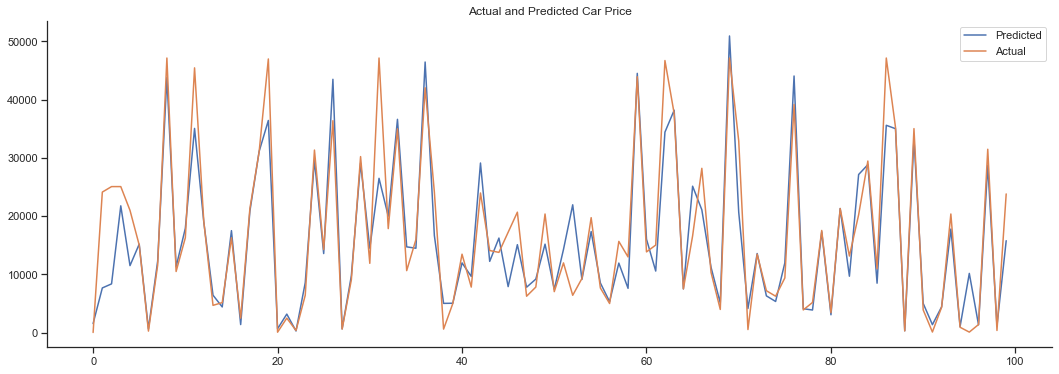

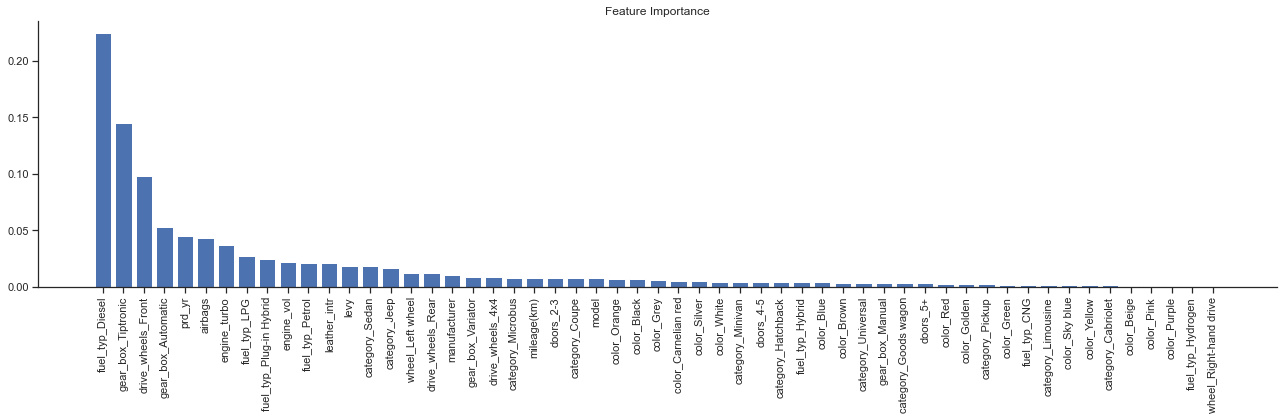

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
# Regressor
regressor = XGBRegressor()

# HYperparameter Grid
grid = {
    'max_depth': [10,15],
    'min_child_weight': [1,5],
    'colsample_bytree': [0.7,1],
    'n_estimators' : [150,500],
}


# GridSearch to find the best parameters
xgb3 = GridSearchCV(estimator = regressor,
                       param_grid = grid,                        
                       scoring = 'neg_mean_squared_error',
                       cv = 5,
                       n_jobs = -1,
                       verbose = 1)

# Fit the train data in the model
xgb3.fit(X_train,y_train)

# Analysing the model with best set of parametes
analyse_model(xgb3.best_estimator_, X_train, X_test, y_train, y_test)

###  **KNN Regressor: Encoding Method 3:**

Fitting 5 folds for each of 49 candidates, totalling 245 fits
MSE         : 70836343.93
RMSE        : 8416.43
MAE         : 5198.51
Train R2    : 0.77
Test R2     : 0.61
Adjusted R2 : 0.6


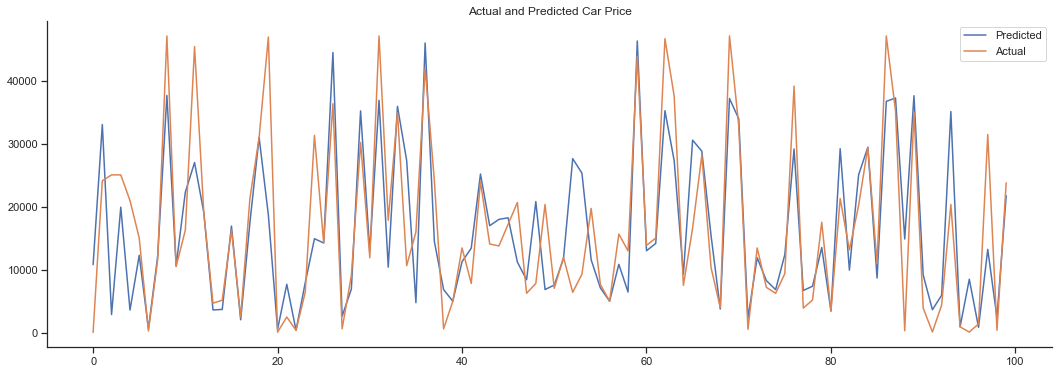

KNeighborsRegressor(n_neighbors=4)

<Figure size 1296x432 with 0 Axes>

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsRegressor()
# defining parameter range

knn_cv3= GridSearchCV(knn,param_grid,
                     cv=5,
                     n_jobs = -1,
                     scoring = 'neg_mean_squared_error',
                     verbose=1)
# fitting the model for grid search
knn_cv3.fit(X_train,y_train)

# Analysing the model with best set of parametes
analyse_model(knn_cv3.best_estimator_, X_train, X_test, y_train, y_test)

#  **Conclusions**: 

The metric performance of variours models correspoding to all three feature engineering approches is given in below table.

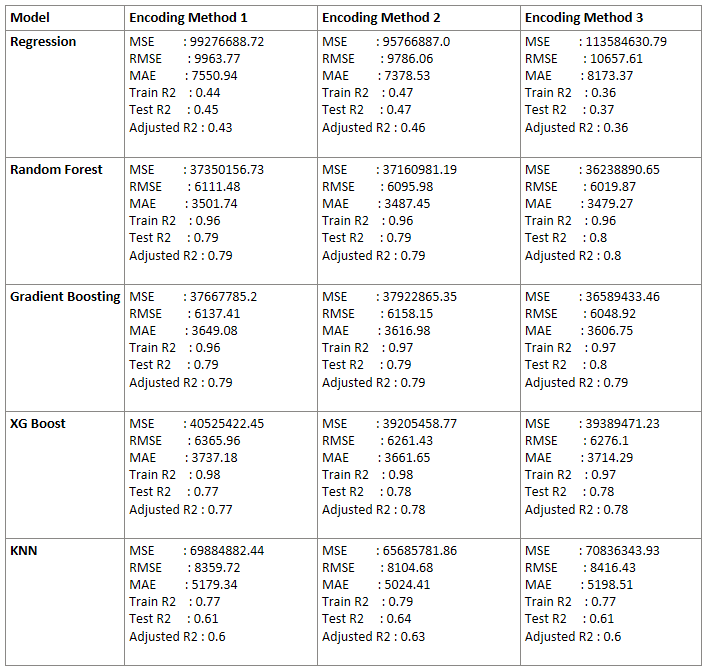

**Important Points**
1. Out of all the models, the Random forest model with encoding method 3 gives the best result and the second runner up model is Gradient boosting with encoding method 3. 
2. For the both the models, the R2 for the test data is 0.80. 
3. The Random forest model with encoding method 3 has the lowest mean square error, root mean square error, mean absolute error, and highest R2 and adjusted R2 square value.
4. It is quite impressive that both the random forest model and gradient bossting are two different types of ensembling technique but both the results gives almost the similar and top results.
5. For the Random forest with encoding method 3 the 10 most important features are in the order: 
Production year > airbags >  mileage > levy > engine volume > fuel type diesel > model > gearbox tiptronic > drive wheels front > gearbox automatic 
6. For the Gradient boosting with encoding method 3 the 10 most important features are in the order: 
Production year > airbags >  mileage > levy > fuel type diesel > engine volume > model > gearbox tiptronic > drive wheels front > gearbox automatic 
7. For both the top two regression models, the top 10 decisive features are almost in the same order.
8. Using grid search CV for random forest with encoding method 3 the best param are **'max_depth': 10, 'n_estimators': 150**.
9. Using grid search CV for gradient boosting with encoding method 3 the best param are **'max_depth': 10, 'n_estimators': 150**.